# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. **Before each experiment remember to re-initialize neural network weights and reset the data providers** so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [34]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 50
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=batch_size, rng=rng)

## Part 2: MNIST Experiments
### 2A: Comparing activation functions  
In this sub-part you should compare the behaviour of Leaky ReLU, ELU, and SELU activation functions on
the MNIST task. Carry out all experiments using 2 hidden layers, with 100 units per hidden layer. You should
compare the results with baseline systems of the same architecture using sigmoid units and using ReLU units.  

### Baseline ReLu

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1.2s to complete
    error(train)=2.65e-01, acc(train)=9.23e-01, error(valid)=2.47e-01, acc(valid)=9.30e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.2s to complete
    error(train)=1.80e-01, acc(train)=9.48e-01, error(valid)=1.77e-01, acc(valid)=9.50e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.4s to complete
    error(train)=1.41e-01, acc(train)=9.59e-01, error(valid)=1.47e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.3s to complete
    error(train)=1.08e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.4s to complete
    error(train)=9.08e-02, acc(train)=9.73e-01, error(valid)=1.10e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.4s to complete
    error(train)=8.72e-02, acc(train)=9.74e-01, error(valid)=1.16e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.2s to complete
    error(train)=6.87e-02, acc(train)=9.81e-01, error(valid)=9.97e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.3s to complete
    error(train)=5.67e-02, acc(train)=9.84e-01, error(valid)=9.32e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.4s to complete
    error(train)=5.51e-02, acc(train)=9.84e-01, error(valid)=9.63e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.3s to complete
    error(train)=4.91e-02, acc(train)=9.87e-01, error(valid)=9.39e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.4s to complete
    error(train)=3.86e-02, acc(train)=9.90e-01, error(valid)=8.45e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1.2s to complete
    error(train)=3.64e-02, acc(train)=9.90e-01, error(valid)=8.81e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.1s to complete
    error(train)=3.02e-02, acc(train)=9.93e-01, error(valid)=8.55e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.4s to complete
    error(train)=3.07e-02, acc(train)=9.92e-01, error(valid)=8.64e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.3s to complete
    error(train)=2.62e-02, acc(train)=9.93e-01, error(valid)=8.69e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.4s to complete
    error(train)=2.01e-02, acc(train)=9.96e-01, error(valid)=8.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.1s to complete
    error(train)=1.85e-02, acc(train)=9.96e-01, error(valid)=8.24e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.4s to complete
    error(train)=1.70e-02, acc(train)=9.97e-01, error(valid)=8.58e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.2s to complete
    error(train)=1.58e-02, acc(train)=9.97e-01, error(valid)=8.28e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.4s to complete
    error(train)=1.39e-02, acc(train)=9.98e-01, error(valid)=8.23e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.3s to complete
    error(train)=1.21e-02, acc(train)=9.98e-01, error(valid)=8.26e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.4s to complete
    error(train)=1.27e-02, acc(train)=9.98e-01, error(valid)=8.70e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.4s to complete
    error(train)=9.38e-03, acc(train)=9.99e-01, error(valid)=8.38e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.8s to complete
    error(train)=8.60e-03, acc(train)=9.99e-01, error(valid)=8.48e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.3s to complete
    error(train)=6.74e-03, acc(train)=9.99e-01, error(valid)=8.37e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.4s to complete
    error(train)=8.21e-03, acc(train)=9.99e-01, error(valid)=8.85e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.4s to complete
    error(train)=6.03e-03, acc(train)=9.99e-01, error(valid)=8.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.2s to complete
    error(train)=7.75e-03, acc(train)=9.98e-01, error(valid)=9.17e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.7s to complete
    error(train)=5.08e-03, acc(train)=1.00e+00, error(valid)=8.89e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.3s to complete
    error(train)=4.12e-03, acc(train)=1.00e+00, error(valid)=8.69e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.8s to complete
    error(train)=4.61e-03, acc(train)=1.00e+00, error(valid)=8.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.9s to complete
    error(train)=3.59e-03, acc(train)=1.00e+00, error(valid)=9.03e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.5s to complete
    error(train)=3.15e-03, acc(train)=1.00e+00, error(valid)=8.96e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.0s to complete
    error(train)=3.09e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.6s to complete
    error(train)=2.84e-03, acc(train)=1.00e+00, error(valid)=9.00e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.5s to complete
    error(train)=2.47e-03, acc(train)=1.00e+00, error(valid)=9.13e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.6s to complete
    error(train)=2.70e-03, acc(train)=1.00e+00, error(valid)=9.28e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.5s to complete
    error(train)=2.21e-03, acc(train)=1.00e+00, error(valid)=9.05e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.6s to complete
    error(train)=2.08e-03, acc(train)=1.00e+00, error(valid)=9.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 1.4s to complete
    error(train)=1.99e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 1.4s to complete
    error(train)=1.87e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.6s to complete
    error(train)=1.82e-03, acc(train)=1.00e+00, error(valid)=9.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.5s to complete
    error(train)=1.84e-03, acc(train)=1.00e+00, error(valid)=9.50e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.5s to complete
    error(train)=1.71e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.6s to complete
    error(train)=1.57e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.4s to complete
    error(train)=1.49e-03, acc(train)=1.00e+00, error(valid)=9.49e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.3s to complete
    error(train)=1.63e-03, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.6s to complete
    error(train)=1.38e-03, acc(train)=1.00e+00, error(valid)=9.57e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.4s to complete
    error(train)=1.28e-03, acc(train)=1.00e+00, error(valid)=9.65e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.3s to complete
    error(train)=1.27e-03, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.2s to complete
    error(train)=1.18e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 1.2s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.5s to complete
    error(train)=1.14e-03, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.5s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=9.95e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.7s to complete
    error(train)=1.03e-03, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.4s to complete
    error(train)=1.00e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.4s to complete
    error(train)=1.00e-03, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.6s to complete
    error(train)=9.56e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.5s to complete
    error(train)=9.50e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.5s to complete
    error(train)=8.89e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.7s to complete
    error(train)=8.53e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 1.5s to complete
    error(train)=8.49e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.6s to complete
    error(train)=8.19e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.4s to complete
    error(train)=8.10e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.0s to complete
    error(train)=7.73e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.3s to complete
    error(train)=7.52e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.0s to complete
    error(train)=7.29e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.3s to complete
    error(train)=7.25e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.1s to complete
    error(train)=7.06e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.3s to complete
    error(train)=6.85e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.4s to complete
    error(train)=6.74e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.3s to complete
    error(train)=6.59e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.3s to complete
    error(train)=6.50e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.4s to complete
    error(train)=6.34e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.4s to complete
    error(train)=6.16e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.4s to complete
    error(train)=6.01e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.4s to complete
    error(train)=5.97e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.2s to complete
    error(train)=5.74e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.1s to complete
    error(train)=5.57e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.0s to complete
    error(train)=5.52e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.4s to complete
    error(train)=5.36e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.3s to complete
    error(train)=5.34e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.4s to complete
    error(train)=5.32e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.3s to complete
    error(train)=5.21e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.6s to complete
    error(train)=5.04e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.5s to complete
    error(train)=4.91e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.4s to complete
    error(train)=4.84e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.1s to complete
    error(train)=4.74e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.3s to complete
    error(train)=4.71e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.4s to complete
    error(train)=4.59e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.5s to complete
    error(train)=4.47e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.7s to complete
    error(train)=4.43e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.2s to complete
    error(train)=4.35e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.7s to complete
    error(train)=4.28e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.4s to complete
    error(train)=4.23e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.4s to complete
    error(train)=4.18e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.4s to complete
    error(train)=4.10e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.1s to complete
    error(train)=4.01e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.1s to complete
    error(train)=4.00e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.2s to complete
    error(train)=3.91e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


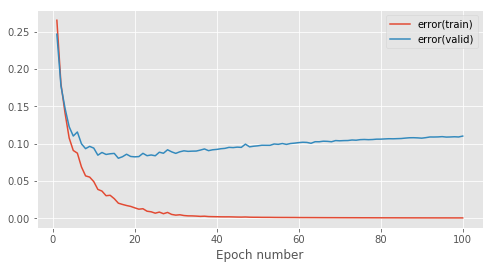

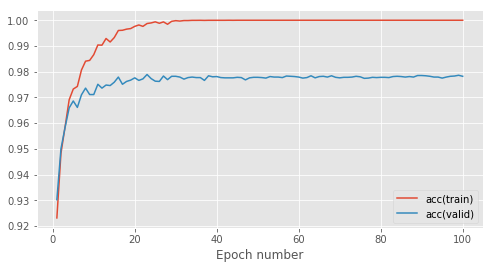

In [32]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#Base Line ReLu
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_baseline, keys, run_time, fig_1_ReLu_baseline, ax_1, fig_2_ReLu_baseline, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_baseline.savefig('error_ReLu_baseline_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_baseline.savefig('accuracy_ReLu_baseline_learning_rate_{}.pdf'.format(learning_rate))



----
### Baseline Sigmoid

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.2s to complete
    error(train)=1.01e+00, acc(train)=7.16e-01, error(valid)=9.79e-01, acc(valid)=7.38e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.5s to complete
    error(train)=5.68e-01, acc(train)=8.47e-01, error(valid)=5.31e-01, acc(valid)=8.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.2s to complete
    error(train)=4.30e-01, acc(train)=8.82e-01, error(valid)=4.01e-01, acc(valid)=8.90e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.3s to complete
    error(train)=3.70e-01, acc(train)=8.98e-01, error(valid)=3.44e-01, acc(valid)=9.05e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 0.9s to complete
    error(train)=3.35e-01, acc(train)=9.06e-01, error(valid)=3.12e-01, acc(valid)=9.12e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.0s to complete
    error(train)=3.11e-01, acc(train)=9.11e-01, error(valid)=2.90e-01, acc(valid)=9.17e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 0.9s to complete
    error(train)=2.95e-01, acc(train)=9.14e-01, error(valid)=2.77e-01, acc(valid)=9.19e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.1s to complete
    error(train)=2.77e-01, acc(train)=9.21e-01, error(valid)=2.60e-01, acc(valid)=9.25e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.1s to complete
    error(train)=2.62e-01, acc(train)=9.25e-01, error(valid)=2.46e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 0.9s to complete
    error(train)=2.51e-01, acc(train)=9.27e-01, error(valid)=2.36e-01, acc(valid)=9.33e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 0.9s to complete
    error(train)=2.40e-01, acc(train)=9.31e-01, error(valid)=2.27e-01, acc(valid)=9.35e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 0.9s to complete
    error(train)=2.28e-01, acc(train)=9.34e-01, error(valid)=2.16e-01, acc(valid)=9.40e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.2s to complete
    error(train)=2.20e-01, acc(train)=9.37e-01, error(valid)=2.10e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 0.9s to complete
    error(train)=2.10e-01, acc(train)=9.39e-01, error(valid)=2.02e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 0.9s to complete
    error(train)=2.02e-01, acc(train)=9.42e-01, error(valid)=1.95e-01, acc(valid)=9.46e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.1s to complete
    error(train)=1.94e-01, acc(train)=9.44e-01, error(valid)=1.87e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.4s to complete
    error(train)=1.87e-01, acc(train)=9.46e-01, error(valid)=1.82e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.1s to complete
    error(train)=1.82e-01, acc(train)=9.47e-01, error(valid)=1.78e-01, acc(valid)=9.51e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.1s to complete
    error(train)=1.75e-01, acc(train)=9.50e-01, error(valid)=1.73e-01, acc(valid)=9.52e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 0.9s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.68e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 0.9s to complete
    error(train)=1.63e-01, acc(train)=9.53e-01, error(valid)=1.63e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 0.9s to complete
    error(train)=1.57e-01, acc(train)=9.54e-01, error(valid)=1.58e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.2s to complete
    error(train)=1.53e-01, acc(train)=9.56e-01, error(valid)=1.55e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.4s to complete
    error(train)=1.47e-01, acc(train)=9.57e-01, error(valid)=1.51e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 0.9s to complete
    error(train)=1.46e-01, acc(train)=9.58e-01, error(valid)=1.51e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 0.8s to complete
    error(train)=1.38e-01, acc(train)=9.60e-01, error(valid)=1.43e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 0.9s to complete
    error(train)=1.35e-01, acc(train)=9.61e-01, error(valid)=1.42e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.2s to complete
    error(train)=1.31e-01, acc(train)=9.62e-01, error(valid)=1.40e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.1s to complete
    error(train)=1.27e-01, acc(train)=9.63e-01, error(valid)=1.37e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.0s to complete
    error(train)=1.24e-01, acc(train)=9.64e-01, error(valid)=1.33e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 0.9s to complete
    error(train)=1.19e-01, acc(train)=9.66e-01, error(valid)=1.30e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.0s to complete
    error(train)=1.17e-01, acc(train)=9.66e-01, error(valid)=1.29e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.0s to complete
    error(train)=1.13e-01, acc(train)=9.67e-01, error(valid)=1.27e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.0s to complete
    error(train)=1.10e-01, acc(train)=9.68e-01, error(valid)=1.24e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 0.9s to complete
    error(train)=1.07e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 0.9s to complete
    error(train)=1.05e-01, acc(train)=9.70e-01, error(valid)=1.22e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 0.9s to complete
    error(train)=1.02e-01, acc(train)=9.71e-01, error(valid)=1.20e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 0.9s to complete
    error(train)=1.01e-01, acc(train)=9.72e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.0s to complete
    error(train)=9.66e-02, acc(train)=9.73e-01, error(valid)=1.16e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 0.9s to complete
    error(train)=9.45e-02, acc(train)=9.74e-01, error(valid)=1.15e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 0.9s to complete
    error(train)=9.21e-02, acc(train)=9.75e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 0.9s to complete
    error(train)=8.98e-02, acc(train)=9.76e-01, error(valid)=1.12e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 0.9s to complete
    error(train)=8.90e-02, acc(train)=9.76e-01, error(valid)=1.11e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 0.9s to complete
    error(train)=8.69e-02, acc(train)=9.76e-01, error(valid)=1.11e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 0.9s to complete
    error(train)=8.49e-02, acc(train)=9.77e-01, error(valid)=1.09e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 0.9s to complete
    error(train)=8.23e-02, acc(train)=9.77e-01, error(valid)=1.07e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 0.9s to complete
    error(train)=8.04e-02, acc(train)=9.78e-01, error(valid)=1.06e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 0.9s to complete
    error(train)=7.83e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 0.9s to complete
    error(train)=7.67e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.0s to complete
    error(train)=7.46e-02, acc(train)=9.80e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 0.9s to complete
    error(train)=7.29e-02, acc(train)=9.80e-01, error(valid)=1.02e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 0.9s to complete
    error(train)=7.20e-02, acc(train)=9.81e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.0s to complete
    error(train)=7.01e-02, acc(train)=9.81e-01, error(valid)=1.01e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.1s to complete
    error(train)=6.94e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.0s to complete
    error(train)=6.69e-02, acc(train)=9.82e-01, error(valid)=9.92e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 0.9s to complete
    error(train)=6.58e-02, acc(train)=9.83e-01, error(valid)=9.92e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.8s to complete
    error(train)=6.49e-02, acc(train)=9.82e-01, error(valid)=9.85e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 0.9s to complete
    error(train)=6.31e-02, acc(train)=9.84e-01, error(valid)=9.66e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 0.9s to complete
    error(train)=6.18e-02, acc(train)=9.83e-01, error(valid)=9.74e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 0.9s to complete
    error(train)=6.15e-02, acc(train)=9.84e-01, error(valid)=9.68e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 0.9s to complete
    error(train)=5.90e-02, acc(train)=9.84e-01, error(valid)=9.57e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 1.7s to complete
    error(train)=5.85e-02, acc(train)=9.85e-01, error(valid)=9.55e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 0.9s to complete
    error(train)=5.78e-02, acc(train)=9.85e-01, error(valid)=9.69e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 0.9s to complete
    error(train)=5.58e-02, acc(train)=9.85e-01, error(valid)=9.46e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 0.9s to complete
    error(train)=5.61e-02, acc(train)=9.85e-01, error(valid)=9.72e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 0.9s to complete
    error(train)=5.41e-02, acc(train)=9.86e-01, error(valid)=9.42e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 0.9s to complete
    error(train)=5.18e-02, acc(train)=9.87e-01, error(valid)=9.22e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 0.9s to complete
    error(train)=5.09e-02, acc(train)=9.87e-01, error(valid)=9.20e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.1s to complete
    error(train)=5.07e-02, acc(train)=9.87e-01, error(valid)=9.26e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.1s to complete
    error(train)=4.92e-02, acc(train)=9.87e-01, error(valid)=9.13e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 0.9s to complete
    error(train)=4.86e-02, acc(train)=9.87e-01, error(valid)=9.19e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 0.9s to complete
    error(train)=4.80e-02, acc(train)=9.88e-01, error(valid)=9.11e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 0.9s to complete
    error(train)=4.72e-02, acc(train)=9.88e-01, error(valid)=9.25e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 0.9s to complete
    error(train)=4.59e-02, acc(train)=9.88e-01, error(valid)=9.10e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 0.9s to complete
    error(train)=4.41e-02, acc(train)=9.89e-01, error(valid)=8.89e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.0s to complete
    error(train)=4.32e-02, acc(train)=9.89e-01, error(valid)=8.94e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.0s to complete
    error(train)=4.30e-02, acc(train)=9.89e-01, error(valid)=8.97e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 0.9s to complete
    error(train)=4.14e-02, acc(train)=9.90e-01, error(valid)=8.76e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 0.9s to complete
    error(train)=4.09e-02, acc(train)=9.90e-01, error(valid)=8.84e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 0.9s to complete
    error(train)=3.99e-02, acc(train)=9.90e-01, error(valid)=8.79e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 0.9s to complete
    error(train)=3.92e-02, acc(train)=9.91e-01, error(valid)=8.74e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 0.9s to complete
    error(train)=3.86e-02, acc(train)=9.91e-01, error(valid)=8.84e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.4s to complete
    error(train)=3.81e-02, acc(train)=9.91e-01, error(valid)=8.72e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 0.9s to complete
    error(train)=3.76e-02, acc(train)=9.91e-01, error(valid)=8.81e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 0.9s to complete
    error(train)=3.64e-02, acc(train)=9.92e-01, error(valid)=8.66e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 0.9s to complete
    error(train)=3.55e-02, acc(train)=9.92e-01, error(valid)=8.73e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 0.9s to complete
    error(train)=3.51e-02, acc(train)=9.92e-01, error(valid)=8.67e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 0.9s to complete
    error(train)=3.39e-02, acc(train)=9.93e-01, error(valid)=8.59e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 0.9s to complete
    error(train)=3.35e-02, acc(train)=9.93e-01, error(valid)=8.68e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 0.9s to complete
    error(train)=3.31e-02, acc(train)=9.93e-01, error(valid)=8.74e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 0.9s to complete
    error(train)=3.30e-02, acc(train)=9.92e-01, error(valid)=8.57e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 0.9s to complete
    error(train)=3.16e-02, acc(train)=9.93e-01, error(valid)=8.54e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 0.9s to complete
    error(train)=3.12e-02, acc(train)=9.93e-01, error(valid)=8.59e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.0s to complete
    error(train)=3.07e-02, acc(train)=9.94e-01, error(valid)=8.50e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.0s to complete
    error(train)=2.97e-02, acc(train)=9.94e-01, error(valid)=8.60e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.0s to complete
    error(train)=2.96e-02, acc(train)=9.94e-01, error(valid)=8.54e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 0.9s to complete
    error(train)=2.92e-02, acc(train)=9.94e-01, error(valid)=8.68e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 0.9s to complete
    error(train)=2.79e-02, acc(train)=9.94e-01, error(valid)=8.53e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 0.9s to complete
    error(train)=2.77e-02, acc(train)=9.94e-01, error(valid)=8.47e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 0.9s to complete
    error(train)=2.70e-02, acc(train)=9.95e-01, error(valid)=8.58e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


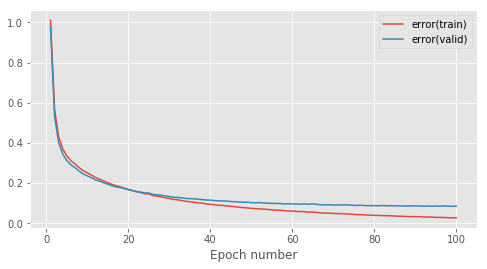

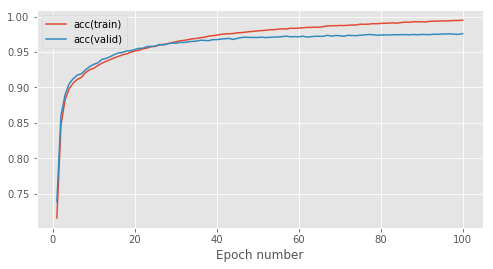

In [35]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#Base Line Sigmoid
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_Sigmoid_baseline, keys, run_time, fig_1_Sigmoid_baseline, ax_1, fig_2_Sigmoid_baseline, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_Sigmoid_baseline.savefig('error_Sigmoid_baseline_learning_rate_{}.pdf'.format(learning_rate))
fig_2_Sigmoid_baseline.savefig('accuracy_Sigmoid_baseline_learning_rate_{}.pdf'.format(learning_rate))


----
### Leaky ReLu

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1.8s to complete
    error(train)=2.37e-01, acc(train)=9.31e-01, error(valid)=2.23e-01, acc(valid)=9.36e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.2s to complete
    error(train)=1.67e-01, acc(train)=9.52e-01, error(valid)=1.63e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.2s to complete
    error(train)=1.30e-01, acc(train)=9.63e-01, error(valid)=1.37e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.2s to complete
    error(train)=1.10e-01, acc(train)=9.68e-01, error(valid)=1.22e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.4s to complete
    error(train)=8.77e-02, acc(train)=9.75e-01, error(valid)=1.04e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.7s to complete
    error(train)=7.49e-02, acc(train)=9.78e-01, error(valid)=9.76e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.8s to complete
    error(train)=6.39e-02, acc(train)=9.82e-01, error(valid)=9.03e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 0.8s to complete
    error(train)=5.70e-02, acc(train)=9.84e-01, error(valid)=8.60e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 0.8s to complete
    error(train)=5.05e-02, acc(train)=9.86e-01, error(valid)=8.66e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 0.8s to complete
    error(train)=4.24e-02, acc(train)=9.89e-01, error(valid)=7.98e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 0.8s to complete
    error(train)=3.79e-02, acc(train)=9.90e-01, error(valid)=8.18e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 0.8s to complete
    error(train)=3.49e-02, acc(train)=9.91e-01, error(valid)=8.01e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 0.8s to complete
    error(train)=3.12e-02, acc(train)=9.92e-01, error(valid)=7.91e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 0.9s to complete
    error(train)=3.07e-02, acc(train)=9.92e-01, error(valid)=8.19e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.1s to complete
    error(train)=2.39e-02, acc(train)=9.95e-01, error(valid)=7.76e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.2s to complete
    error(train)=2.37e-02, acc(train)=9.95e-01, error(valid)=8.10e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.0s to complete
    error(train)=1.98e-02, acc(train)=9.96e-01, error(valid)=7.98e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 0.8s to complete
    error(train)=1.98e-02, acc(train)=9.96e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.7s to complete
    error(train)=1.76e-02, acc(train)=9.96e-01, error(valid)=8.24e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.4s to complete
    error(train)=1.46e-02, acc(train)=9.97e-01, error(valid)=7.75e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.0s to complete
    error(train)=1.59e-02, acc(train)=9.96e-01, error(valid)=8.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 0.9s to complete
    error(train)=1.08e-02, acc(train)=9.98e-01, error(valid)=8.01e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 0.8s to complete
    error(train)=1.14e-02, acc(train)=9.98e-01, error(valid)=8.15e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.0s to complete
    error(train)=1.04e-02, acc(train)=9.98e-01, error(valid)=8.50e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 0.8s to complete
    error(train)=8.22e-03, acc(train)=9.99e-01, error(valid)=8.24e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 0.8s to complete
    error(train)=7.50e-03, acc(train)=9.99e-01, error(valid)=8.52e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 0.8s to complete
    error(train)=6.43e-03, acc(train)=9.99e-01, error(valid)=8.44e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 0.8s to complete
    error(train)=5.48e-03, acc(train)=1.00e+00, error(valid)=8.43e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 0.8s to complete
    error(train)=5.56e-03, acc(train)=9.99e-01, error(valid)=8.59e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.2s to complete
    error(train)=4.97e-03, acc(train)=1.00e+00, error(valid)=8.51e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 0.9s to complete
    error(train)=4.32e-03, acc(train)=1.00e+00, error(valid)=8.79e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 0.8s to complete
    error(train)=4.42e-03, acc(train)=1.00e+00, error(valid)=8.92e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 0.8s to complete
    error(train)=3.49e-03, acc(train)=1.00e+00, error(valid)=8.91e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 0.8s to complete
    error(train)=3.48e-03, acc(train)=1.00e+00, error(valid)=8.75e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 0.8s to complete
    error(train)=3.04e-03, acc(train)=1.00e+00, error(valid)=8.95e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 0.8s to complete
    error(train)=2.81e-03, acc(train)=1.00e+00, error(valid)=9.02e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 0.8s to complete
    error(train)=2.60e-03, acc(train)=1.00e+00, error(valid)=9.23e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 0.8s to complete
    error(train)=2.73e-03, acc(train)=1.00e+00, error(valid)=9.24e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 0.8s to complete
    error(train)=2.37e-03, acc(train)=1.00e+00, error(valid)=9.13e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 0.8s to complete
    error(train)=2.21e-03, acc(train)=1.00e+00, error(valid)=9.16e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 0.8s to complete
    error(train)=2.09e-03, acc(train)=1.00e+00, error(valid)=9.15e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.0s to complete
    error(train)=1.98e-03, acc(train)=1.00e+00, error(valid)=9.25e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 0.8s to complete
    error(train)=1.81e-03, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.0s to complete
    error(train)=1.80e-03, acc(train)=1.00e+00, error(valid)=9.43e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.1s to complete
    error(train)=1.67e-03, acc(train)=1.00e+00, error(valid)=9.51e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.5s to complete
    error(train)=1.60e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.5s to complete
    error(train)=1.54e-03, acc(train)=1.00e+00, error(valid)=9.63e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.4s to complete
    error(train)=1.46e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.5s to complete
    error(train)=1.40e-03, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.5s to complete
    error(train)=1.35e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.5s to complete
    error(train)=1.30e-03, acc(train)=1.00e+00, error(valid)=9.80e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 1.4s to complete
    error(train)=1.23e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.4s to complete
    error(train)=1.24e-03, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.4s to complete
    error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.3s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=9.95e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.4s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.5s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.5s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.5s to complete
    error(train)=9.74e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.5s to complete
    error(train)=9.38e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.5s to complete
    error(train)=9.33e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 1.3s to complete
    error(train)=9.06e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.5s to complete
    error(train)=9.06e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.5s to complete
    error(train)=8.78e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.3s to complete
    error(train)=8.49e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.4s to complete
    error(train)=8.16e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.5s to complete
    error(train)=7.81e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 0.9s to complete
    error(train)=7.66e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 0.7s to complete
    error(train)=7.52e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 0.7s to complete
    error(train)=7.53e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 0.7s to complete
    error(train)=7.16e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 0.7s to complete
    error(train)=7.05e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 0.8s to complete
    error(train)=6.86e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 0.7s to complete
    error(train)=6.73e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 0.8s to complete
    error(train)=6.56e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 0.7s to complete
    error(train)=6.37e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 0.8s to complete
    error(train)=6.29e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 0.8s to complete
    error(train)=6.25e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 0.7s to complete
    error(train)=6.04e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 0.8s to complete
    error(train)=5.91e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 0.8s to complete
    error(train)=5.91e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 0.8s to complete
    error(train)=5.65e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.5s to complete
    error(train)=5.62e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.5s to complete
    error(train)=5.44e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 0.8s to complete
    error(train)=5.35e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 0.8s to complete
    error(train)=5.26e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 0.7s to complete
    error(train)=5.16e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 0.7s to complete
    error(train)=5.08e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 0.8s to complete
    error(train)=5.00e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 0.8s to complete
    error(train)=4.97e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 0.8s to complete
    error(train)=4.84e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 0.7s to complete
    error(train)=4.75e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 0.7s to complete
    error(train)=4.67e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 0.7s to complete
    error(train)=4.55e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 0.7s to complete
    error(train)=4.57e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 0.7s to complete
    error(train)=4.44e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 0.7s to complete
    error(train)=4.33e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 0.7s to complete
    error(train)=4.27e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.5s to complete
    error(train)=4.24e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.1s to complete
    error(train)=4.17e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


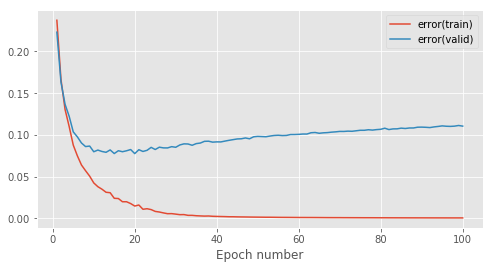

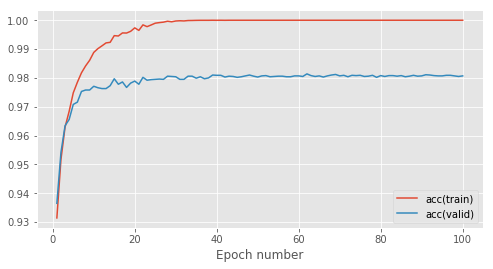

In [36]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

# Leaky ReLu 
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_lrelu_2, keys, run_time, fig_1_lrelu_2, ax_1, fig_2_lrelu_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_lrelu_2.savefig('error_Leaky_ReLu_learning_rate_{}.pdf'.format(learning_rate))
fig_2_lrelu_2.savefig('accuracy_Leaky_ReLu_learning_rate_{}.pdf'.format(learning_rate))


----
###  ELU

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.5s to complete
    error(train)=2.78e-01, acc(train)=9.19e-01, error(valid)=2.61e-01, acc(valid)=9.23e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.7s to complete
    error(train)=2.12e-01, acc(train)=9.39e-01, error(valid)=2.06e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.8s to complete
    error(train)=1.69e-01, acc(train)=9.50e-01, error(valid)=1.69e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.8s to complete
    error(train)=1.38e-01, acc(train)=9.59e-01, error(valid)=1.42e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.8s to complete
    error(train)=1.20e-01, acc(train)=9.64e-01, error(valid)=1.31e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.8s to complete
    error(train)=1.02e-01, acc(train)=9.71e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.2s to complete
    error(train)=9.13e-02, acc(train)=9.74e-01, error(valid)=1.11e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.3s to complete
    error(train)=8.05e-02, acc(train)=9.76e-01, error(valid)=1.03e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.2s to complete
    error(train)=7.66e-02, acc(train)=9.77e-01, error(valid)=9.94e-02, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.0s to complete
    error(train)=6.62e-02, acc(train)=9.81e-01, error(valid)=9.40e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.0s to complete
    error(train)=6.21e-02, acc(train)=9.82e-01, error(valid)=9.42e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.2s to complete
    error(train)=5.79e-02, acc(train)=9.83e-01, error(valid)=9.38e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.4s to complete
    error(train)=4.93e-02, acc(train)=9.86e-01, error(valid)=8.55e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.3s to complete
    error(train)=4.45e-02, acc(train)=9.87e-01, error(valid)=8.49e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.3s to complete
    error(train)=4.14e-02, acc(train)=9.89e-01, error(valid)=8.26e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.2s to complete
    error(train)=4.11e-02, acc(train)=9.88e-01, error(valid)=8.63e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.1s to complete
    error(train)=3.70e-02, acc(train)=9.89e-01, error(valid)=8.57e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.1s to complete
    error(train)=3.75e-02, acc(train)=9.89e-01, error(valid)=8.76e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.0s to complete
    error(train)=2.83e-02, acc(train)=9.93e-01, error(valid)=8.17e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.3s to complete
    error(train)=2.57e-02, acc(train)=9.94e-01, error(valid)=8.04e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.0s to complete
    error(train)=2.51e-02, acc(train)=9.94e-01, error(valid)=8.04e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.2s to complete
    error(train)=2.34e-02, acc(train)=9.94e-01, error(valid)=8.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.4s to complete
    error(train)=2.15e-02, acc(train)=9.95e-01, error(valid)=8.14e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.2s to complete
    error(train)=2.37e-02, acc(train)=9.93e-01, error(valid)=9.03e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.0s to complete
    error(train)=1.79e-02, acc(train)=9.96e-01, error(valid)=8.26e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=1.54e-02, acc(train)=9.97e-01, error(valid)=8.12e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.3s to complete
    error(train)=1.39e-02, acc(train)=9.98e-01, error(valid)=8.27e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.3s to complete
    error(train)=1.40e-02, acc(train)=9.97e-01, error(valid)=8.33e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.5s to complete
    error(train)=1.25e-02, acc(train)=9.98e-01, error(valid)=8.56e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.3s to complete
    error(train)=1.15e-02, acc(train)=9.98e-01, error(valid)=8.58e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.4s to complete
    error(train)=1.05e-02, acc(train)=9.98e-01, error(valid)=8.68e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.0s to complete
    error(train)=9.15e-03, acc(train)=9.99e-01, error(valid)=8.75e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.3s to complete
    error(train)=8.37e-03, acc(train)=9.99e-01, error(valid)=8.66e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.3s to complete
    error(train)=8.51e-03, acc(train)=9.99e-01, error(valid)=8.67e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.1s to complete
    error(train)=7.91e-03, acc(train)=9.99e-01, error(valid)=8.92e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.1s to complete
    error(train)=6.89e-03, acc(train)=9.99e-01, error(valid)=8.86e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.1s to complete
    error(train)=6.59e-03, acc(train)=9.99e-01, error(valid)=9.00e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.1s to complete
    error(train)=5.63e-03, acc(train)=1.00e+00, error(valid)=8.98e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.1s to complete
    error(train)=5.18e-03, acc(train)=1.00e+00, error(valid)=9.21e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.3s to complete
    error(train)=5.78e-03, acc(train)=1.00e+00, error(valid)=9.30e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.1s to complete
    error(train)=4.66e-03, acc(train)=1.00e+00, error(valid)=9.13e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.8s to complete
    error(train)=4.39e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.3s to complete
    error(train)=4.14e-03, acc(train)=1.00e+00, error(valid)=9.39e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.1s to complete
    error(train)=4.16e-03, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.0s to complete
    error(train)=3.25e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.3s to complete
    error(train)=3.03e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.3s to complete
    error(train)=2.97e-03, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.1s to complete
    error(train)=2.87e-03, acc(train)=1.00e+00, error(valid)=9.72e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.2s to complete
    error(train)=2.66e-03, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.1s to complete
    error(train)=2.51e-03, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.2s to complete
    error(train)=2.38e-03, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.2s to complete
    error(train)=2.37e-03, acc(train)=1.00e+00, error(valid)=9.88e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.1s to complete
    error(train)=2.21e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.4s to complete
    error(train)=2.10e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.1s to complete
    error(train)=1.95e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.1s to complete
    error(train)=1.84e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.2s to complete
    error(train)=1.81e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.6s to complete
    error(train)=1.88e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.5s to complete
    error(train)=1.75e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.3s to complete
    error(train)=1.57e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.0s to complete
    error(train)=1.55e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.2s to complete
    error(train)=1.53e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.3s to complete
    error(train)=1.56e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.0s to complete
    error(train)=1.39e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.1s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.2s to complete
    error(train)=1.31e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.0s to complete
    error(train)=1.24e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.2s to complete
    error(train)=1.25e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.1s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.0s to complete
    error(train)=1.22e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.3s to complete
    error(train)=1.22e-03, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.2s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.2s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.0s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.4s to complete
    error(train)=9.91e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.2s to complete
    error(train)=9.94e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.4s to complete
    error(train)=9.62e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.2s to complete
    error(train)=9.34e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.1s to complete
    error(train)=9.16e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.2s to complete
    error(train)=8.84e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.1s to complete
    error(train)=8.79e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.1s to complete
    error(train)=8.63e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.2s to complete
    error(train)=8.26e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.3s to complete
    error(train)=7.99e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.4s to complete
    error(train)=7.79e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.6s to complete
    error(train)=7.70e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.4s to complete
    error(train)=7.56e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.1s to complete
    error(train)=7.41e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.3s to complete
    error(train)=7.16e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.4s to complete
    error(train)=7.04e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.3s to complete
    error(train)=7.04e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.2s to complete
    error(train)=6.83e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.2s to complete
    error(train)=6.63e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.4s to complete
    error(train)=6.62e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.0s to complete
    error(train)=6.44e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.1s to complete
    error(train)=6.47e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.4s to complete
    error(train)=6.22e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.0s to complete
    error(train)=6.10e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.1s to complete
    error(train)=6.04e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.0s to complete
    error(train)=5.81e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


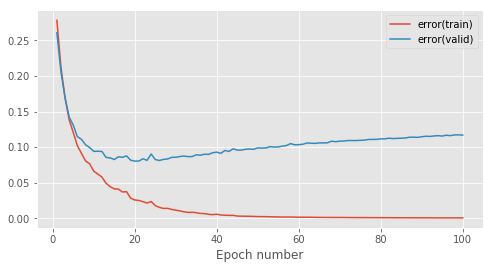

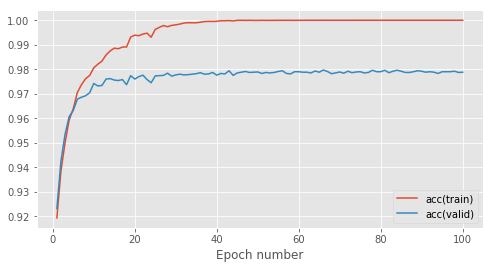

In [37]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

# ELU 
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ELU_2, keys, run_time, fig_1_ELU_2, ax_1, fig_2_ELU_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ELU_2.savefig('error_ELU_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ELU_2.savefig('accuracy_ELU_learning_rate_{}.pdf'.format(learning_rate))


----
###  SELU

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.7s to complete
    error(train)=2.68e-01, acc(train)=9.23e-01, error(valid)=2.53e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.2s to complete
    error(train)=2.06e-01, acc(train)=9.41e-01, error(valid)=2.01e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.3s to complete
    error(train)=1.61e-01, acc(train)=9.54e-01, error(valid)=1.62e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.5s to complete
    error(train)=1.35e-01, acc(train)=9.61e-01, error(valid)=1.45e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.6s to complete
    error(train)=1.17e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.2s to complete
    error(train)=9.95e-02, acc(train)=9.70e-01, error(valid)=1.19e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.3s to complete
    error(train)=8.67e-02, acc(train)=9.74e-01, error(valid)=1.10e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.2s to complete
    error(train)=8.52e-02, acc(train)=9.75e-01, error(valid)=1.13e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.4s to complete
    error(train)=6.82e-02, acc(train)=9.80e-01, error(valid)=9.62e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.3s to complete
    error(train)=5.88e-02, acc(train)=9.84e-01, error(valid)=9.00e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.3s to complete
    error(train)=5.36e-02, acc(train)=9.85e-01, error(valid)=9.07e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.1s to complete
    error(train)=5.17e-02, acc(train)=9.85e-01, error(valid)=9.02e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.3s to complete
    error(train)=4.77e-02, acc(train)=9.87e-01, error(valid)=9.21e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.6s to complete
    error(train)=4.23e-02, acc(train)=9.88e-01, error(valid)=8.90e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.5s to complete
    error(train)=3.75e-02, acc(train)=9.90e-01, error(valid)=8.72e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.5s to complete
    error(train)=3.41e-02, acc(train)=9.91e-01, error(valid)=8.50e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.7s to complete
    error(train)=2.92e-02, acc(train)=9.93e-01, error(valid)=8.27e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.4s to complete
    error(train)=2.92e-02, acc(train)=9.92e-01, error(valid)=8.56e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.2s to complete
    error(train)=2.41e-02, acc(train)=9.94e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.2s to complete
    error(train)=2.51e-02, acc(train)=9.94e-01, error(valid)=8.23e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.2s to complete
    error(train)=2.06e-02, acc(train)=9.96e-01, error(valid)=8.28e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.0s to complete
    error(train)=1.95e-02, acc(train)=9.96e-01, error(valid)=8.37e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.2s to complete
    error(train)=1.59e-02, acc(train)=9.97e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.0s to complete
    error(train)=1.57e-02, acc(train)=9.97e-01, error(valid)=8.42e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.2s to complete
    error(train)=1.35e-02, acc(train)=9.98e-01, error(valid)=8.45e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.1s to complete
    error(train)=1.36e-02, acc(train)=9.97e-01, error(valid)=8.51e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.2s to complete
    error(train)=1.11e-02, acc(train)=9.98e-01, error(valid)=8.25e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.4s to complete
    error(train)=1.17e-02, acc(train)=9.98e-01, error(valid)=8.62e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.3s to complete
    error(train)=9.63e-03, acc(train)=9.99e-01, error(valid)=8.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.2s to complete
    error(train)=8.07e-03, acc(train)=9.99e-01, error(valid)=8.41e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.3s to complete
    error(train)=8.03e-03, acc(train)=9.99e-01, error(valid)=8.63e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.3s to complete
    error(train)=8.63e-03, acc(train)=9.99e-01, error(valid)=9.02e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.3s to complete
    error(train)=5.98e-03, acc(train)=1.00e+00, error(valid)=8.63e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.2s to complete
    error(train)=6.24e-03, acc(train)=1.00e+00, error(valid)=8.70e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.2s to complete
    error(train)=5.66e-03, acc(train)=1.00e+00, error(valid)=8.73e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.4s to complete
    error(train)=4.63e-03, acc(train)=1.00e+00, error(valid)=8.87e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.4s to complete
    error(train)=4.27e-03, acc(train)=1.00e+00, error(valid)=9.00e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.2s to complete
    error(train)=4.69e-03, acc(train)=1.00e+00, error(valid)=8.85e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.5s to complete
    error(train)=3.83e-03, acc(train)=1.00e+00, error(valid)=8.94e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.5s to complete
    error(train)=4.13e-03, acc(train)=1.00e+00, error(valid)=9.19e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.2s to complete
    error(train)=3.31e-03, acc(train)=1.00e+00, error(valid)=9.24e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.2s to complete
    error(train)=3.20e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.0s to complete
    error(train)=3.11e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.2s to complete
    error(train)=2.70e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.5s to complete
    error(train)=2.85e-03, acc(train)=1.00e+00, error(valid)=9.39e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.5s to complete
    error(train)=2.67e-03, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.3s to complete
    error(train)=2.37e-03, acc(train)=1.00e+00, error(valid)=9.40e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.2s to complete
    error(train)=2.34e-03, acc(train)=1.00e+00, error(valid)=9.49e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.0s to complete
    error(train)=2.09e-03, acc(train)=1.00e+00, error(valid)=9.55e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.8s to complete
    error(train)=2.10e-03, acc(train)=1.00e+00, error(valid)=9.51e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.0s to complete
    error(train)=1.95e-03, acc(train)=1.00e+00, error(valid)=9.60e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.0s to complete
    error(train)=1.82e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.3s to complete
    error(train)=1.76e-03, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.0s to complete
    error(train)=1.75e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.1s to complete
    error(train)=1.62e-03, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.3s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.80e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.4s to complete
    error(train)=1.54e-03, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.1s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=9.94e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.3s to complete
    error(train)=1.41e-03, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.2s to complete
    error(train)=1.35e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.0s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.1s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.3s to complete
    error(train)=1.26e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.2s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.2s to complete
    error(train)=1.18e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.3s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.5s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.2s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.3s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.4s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.4s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.3s to complete
    error(train)=9.72e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.3s to complete
    error(train)=9.33e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.7s to complete
    error(train)=9.07e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.2s to complete
    error(train)=9.00e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.3s to complete
    error(train)=8.79e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.3s to complete
    error(train)=8.54e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.4s to complete
    error(train)=8.38e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.2s to complete
    error(train)=8.28e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.2s to complete
    error(train)=8.17e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.2s to complete
    error(train)=8.09e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.2s to complete
    error(train)=7.70e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.5s to complete
    error(train)=7.53e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.3s to complete
    error(train)=7.36e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.4s to complete
    error(train)=7.22e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.5s to complete
    error(train)=7.08e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.5s to complete
    error(train)=7.04e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.3s to complete
    error(train)=6.81e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.2s to complete
    error(train)=6.75e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.2s to complete
    error(train)=6.55e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.1s to complete
    error(train)=6.42e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.3s to complete
    error(train)=6.37e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.0s to complete
    error(train)=6.24e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.2s to complete
    error(train)=6.16e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.3s to complete
    error(train)=6.01e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.2s to complete
    error(train)=5.94e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.1s to complete
    error(train)=5.77e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.6s to complete
    error(train)=5.74e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.4s to complete
    error(train)=5.64e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.2s to complete
    error(train)=5.57e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


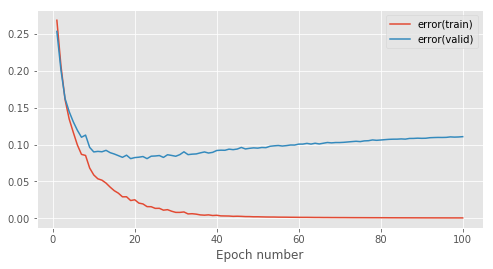

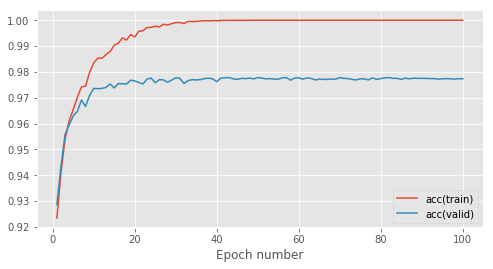

In [38]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

# SELU 
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_SELU_2, keys, run_time, fig_1_SELU_2, ax_1, fig_2_SELU_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_SELU_2.savefig('error_SELU_2_learning_rate_{}.pdf'.format(learning_rate))
fig_2_SELU_2.savefig('accuracy_SELU_2_learning_rate_{}.pdf'.format(learning_rate))

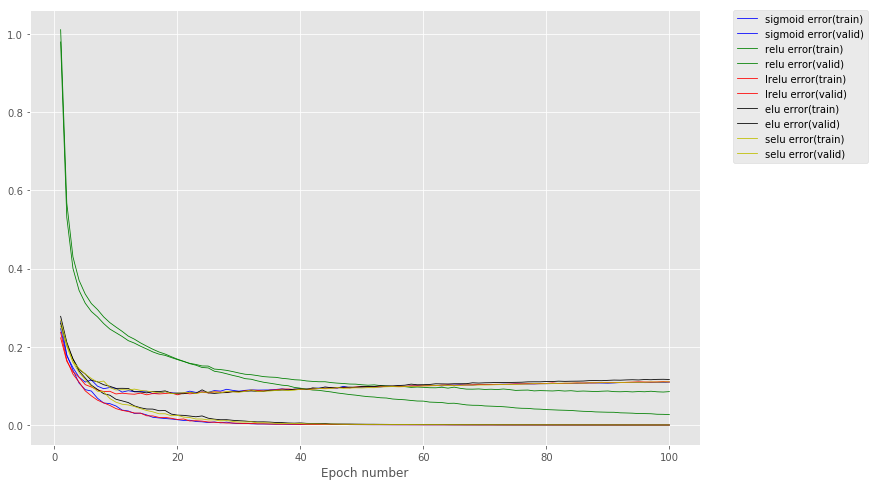

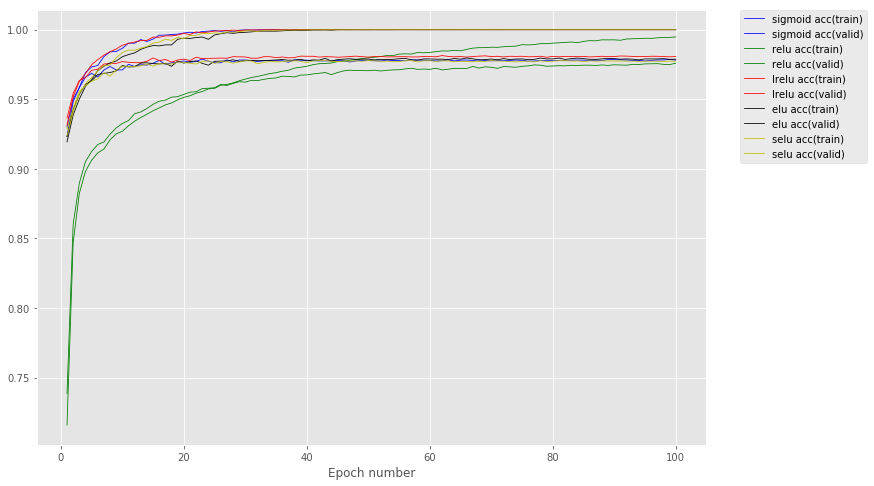

In [54]:
# Plot the change in the validation and training set error over training.
fig_1_all_activations = plt.figure(figsize=(12, 8))
color = ['b', 'g', 'r', 'k',  'y', 'k', 'w']
plot_list = [stats_ReLu_baseline,stats_Sigmoid_baseline,stats_lrelu_2,stats_ELU_2,stats_SELU_2]
plot_list_name = ['sigmoid','relu','lrelu','elu','selu']
ax_1 = fig_1_all_activations.add_subplot(111)

for i,s in enumerate(plot_list):#,stats_ELU_4,stats_ELU_5,stats_ELU_6,stats_ELU_7,stats_ELU_8]:
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, s.shape[0]) * stats_interval, 
              s[1:, keys[k]], label=str(plot_list_name[i]+' '+k),color=color[i],linewidth=0.8)

ax_1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_1.set_xlabel('Epoch number')

# Plot the change in the validation and training set accuracy over training.
fig_2_all_activations = plt.figure(figsize=(12, 8))
ax_2 = fig_2_all_activations.add_subplot(111)
for i,s in enumerate(plot_list):
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, s.shape[0]) * stats_interval, 
              s[1:, keys[k]], label=str(plot_list_name[i]+' '+k),color=color[i],linewidth=0.8)
ax_2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_2.set_xlabel('Epoch number')

fig_1_all_activations.savefig('error_all_activations.pdf',bbox_inches = "tight")
fig_2_all_activations.savefig('accuracy_all_activations.pdf',bbox_inches = "tight" )

### 2B: Deep neural network experiments

#### 2B.1 
Based on the results of Part 2A, choose one activation function, and compare networks with 2–8 hidden layers, using 100 hidden units per hidden layer.

----
#### ReLu 2 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1.5s to complete
    error(train)=2.41e-01, acc(train)=9.31e-01, error(valid)=2.27e-01, acc(valid)=9.36e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.1s to complete
    error(train)=1.70e-01, acc(train)=9.50e-01, error(valid)=1.67e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.1s to complete
    error(train)=1.37e-01, acc(train)=9.61e-01, error(valid)=1.39e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.1s to complete
    error(train)=1.07e-01, acc(train)=9.69e-01, error(valid)=1.22e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.0s to complete
    error(train)=9.24e-02, acc(train)=9.73e-01, error(valid)=1.11e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.0s to complete
    error(train)=7.68e-02, acc(train)=9.77e-01, error(valid)=9.95e-02, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.0s to complete
    error(train)=6.68e-02, acc(train)=9.81e-01, error(valid)=9.82e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.0s to complete
    error(train)=5.45e-02, acc(train)=9.85e-01, error(valid)=8.90e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.0s to complete
    error(train)=5.08e-02, acc(train)=9.86e-01, error(valid)=8.93e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.0s to complete
    error(train)=4.69e-02, acc(train)=9.86e-01, error(valid)=8.62e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.0s to complete
    error(train)=3.88e-02, acc(train)=9.89e-01, error(valid)=8.41e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1.0s to complete
    error(train)=3.42e-02, acc(train)=9.91e-01, error(valid)=8.37e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.0s to complete
    error(train)=3.03e-02, acc(train)=9.92e-01, error(valid)=8.51e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.0s to complete
    error(train)=2.78e-02, acc(train)=9.93e-01, error(valid)=8.05e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 0.9s to complete
    error(train)=2.33e-02, acc(train)=9.95e-01, error(valid)=8.24e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 0.9s to complete
    error(train)=2.31e-02, acc(train)=9.95e-01, error(valid)=8.37e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 0.9s to complete
    error(train)=1.93e-02, acc(train)=9.96e-01, error(valid)=8.26e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 0.9s to complete
    error(train)=1.74e-02, acc(train)=9.96e-01, error(valid)=8.35e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.0s to complete
    error(train)=1.69e-02, acc(train)=9.96e-01, error(valid)=8.76e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.0s to complete
    error(train)=1.34e-02, acc(train)=9.98e-01, error(valid)=8.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.0s to complete
    error(train)=1.27e-02, acc(train)=9.98e-01, error(valid)=8.29e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 0.9s to complete
    error(train)=1.01e-02, acc(train)=9.98e-01, error(valid)=8.33e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.0s to complete
    error(train)=8.76e-03, acc(train)=9.99e-01, error(valid)=8.50e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.0s to complete
    error(train)=1.08e-02, acc(train)=9.98e-01, error(valid)=8.83e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 0.9s to complete
    error(train)=9.26e-03, acc(train)=9.99e-01, error(valid)=8.79e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.0s to complete
    error(train)=6.77e-03, acc(train)=9.99e-01, error(valid)=8.80e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.0s to complete
    error(train)=6.21e-03, acc(train)=9.99e-01, error(valid)=9.05e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.0s to complete
    error(train)=6.59e-03, acc(train)=9.99e-01, error(valid)=9.11e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.0s to complete
    error(train)=4.54e-03, acc(train)=1.00e+00, error(valid)=8.78e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.0s to complete
    error(train)=4.18e-03, acc(train)=1.00e+00, error(valid)=8.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 0.9s to complete
    error(train)=4.40e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 0.9s to complete
    error(train)=4.34e-03, acc(train)=1.00e+00, error(valid)=9.08e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 0.9s to complete
    error(train)=4.15e-03, acc(train)=1.00e+00, error(valid)=9.24e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.0s to complete
    error(train)=3.19e-03, acc(train)=1.00e+00, error(valid)=8.97e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 0.9s to complete
    error(train)=3.04e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.0s to complete
    error(train)=2.53e-03, acc(train)=1.00e+00, error(valid)=9.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.0s to complete
    error(train)=2.52e-03, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.0s to complete
    error(train)=2.33e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.0s to complete
    error(train)=2.18e-03, acc(train)=1.00e+00, error(valid)=9.49e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 0.9s to complete
    error(train)=1.98e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 0.9s to complete
    error(train)=1.91e-03, acc(train)=1.00e+00, error(valid)=9.62e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.0s to complete
    error(train)=1.89e-03, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.0s to complete
    error(train)=1.78e-03, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.0s to complete
    error(train)=1.65e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.0s to complete
    error(train)=1.60e-03, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.0s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.0s to complete
    error(train)=1.41e-03, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 0.9s to complete
    error(train)=1.39e-03, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 0.9s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 0.9s to complete
    error(train)=1.25e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 0.9s to complete
    error(train)=1.22e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 0.9s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.0s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 0.9s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.0s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.0s to complete
    error(train)=1.02e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 0.9s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.0s to complete
    error(train)=9.90e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 0.9s to complete
    error(train)=9.34e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 0.9s to complete
    error(train)=8.94e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 0.9s to complete
    error(train)=8.87e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 0.9s to complete
    error(train)=8.58e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.0s to complete
    error(train)=8.39e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.0s to complete
    error(train)=7.96e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.0s to complete
    error(train)=7.70e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 0.9s to complete
    error(train)=7.64e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.0s to complete
    error(train)=7.47e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 0.9s to complete
    error(train)=7.23e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 0.9s to complete
    error(train)=7.01e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 0.9s to complete
    error(train)=6.87e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 0.9s to complete
    error(train)=6.74e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 0.9s to complete
    error(train)=6.61e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 0.9s to complete
    error(train)=6.41e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 0.9s to complete
    error(train)=6.21e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 0.9s to complete
    error(train)=6.12e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.7s to complete
    error(train)=6.00e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.0s to complete
    error(train)=5.90e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.1s to complete
    error(train)=5.76e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 0.9s to complete
    error(train)=5.67e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.0s to complete
    error(train)=5.58e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.1s to complete
    error(train)=5.46e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.0s to complete
    error(train)=5.31e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.0s to complete
    error(train)=5.28e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.0s to complete
    error(train)=5.19e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.0s to complete
    error(train)=5.02e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.0s to complete
    error(train)=4.98e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.0s to complete
    error(train)=4.90e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.8s to complete
    error(train)=4.78e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.0s to complete
    error(train)=4.71e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.0s to complete
    error(train)=4.64e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.0s to complete
    error(train)=4.59e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.0s to complete
    error(train)=4.45e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 0.9s to complete
    error(train)=4.37e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.0s to complete
    error(train)=4.30e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.0s to complete
    error(train)=4.27e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.0s to complete
    error(train)=4.20e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.0s to complete
    error(train)=4.13e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.0s to complete
    error(train)=4.05e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.0s to complete
    error(train)=4.01e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.0s to complete
    error(train)=3.92e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


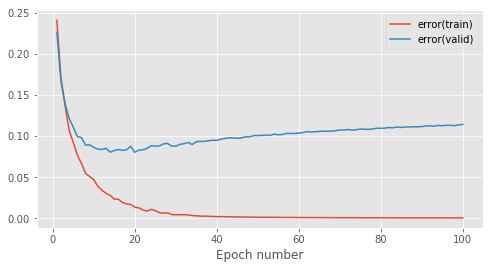

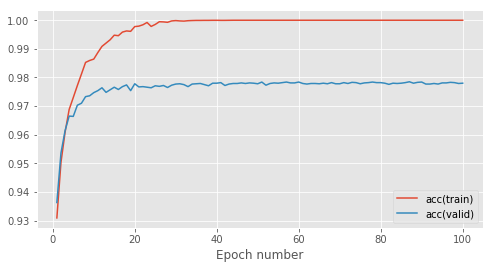

In [19]:
# ReLu 2 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_2, keys, run_time, fig_1_ReLu_2, ax_1, fig_2_ReLu_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_2.savefig('error_ReLu_2_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_2.savefig('accuracy_ReLu_2_learning_rate_{}.pdf'.format(learning_rate))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.8s to complete
    error(train)=2.36e-01, acc(train)=9.30e-01, error(valid)=2.22e-01, acc(valid)=9.34e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.9s to complete
    error(train)=1.49e-01, acc(train)=9.56e-01, error(valid)=1.48e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.4s to complete
    error(train)=1.06e-01, acc(train)=9.68e-01, error(valid)=1.19e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.7s to complete
    error(train)=8.29e-02, acc(train)=9.76e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.4s to complete
    error(train)=1.20e-01, acc(train)=9.62e-01, error(valid)=1.46e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.0s to complete
    error(train)=5.46e-02, acc(train)=9.84e-01, error(valid)=9.21e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.5s to complete
    error(train)=5.74e-02, acc(train)=9.82e-01, error(valid)=9.98e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.3s to complete
    error(train)=4.87e-02, acc(train)=9.85e-01, error(valid)=9.50e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.3s to complete
    error(train)=4.03e-02, acc(train)=9.88e-01, error(valid)=8.91e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.5s to complete
    error(train)=3.41e-02, acc(train)=9.90e-01, error(valid)=9.05e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.5s to complete
    error(train)=2.62e-02, acc(train)=9.93e-01, error(valid)=8.39e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1.6s to complete
    error(train)=2.50e-02, acc(train)=9.93e-01, error(valid)=9.20e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.6s to complete
    error(train)=2.59e-02, acc(train)=9.92e-01, error(valid)=9.00e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.3s to complete
    error(train)=1.73e-02, acc(train)=9.95e-01, error(valid)=8.69e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.5s to complete
    error(train)=1.36e-02, acc(train)=9.97e-01, error(valid)=8.87e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.5s to complete
    error(train)=1.29e-02, acc(train)=9.97e-01, error(valid)=8.97e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.5s to complete
    error(train)=1.19e-02, acc(train)=9.97e-01, error(valid)=9.20e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.7s to complete
    error(train)=7.46e-03, acc(train)=9.99e-01, error(valid)=8.89e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.5s to complete
    error(train)=7.61e-03, acc(train)=9.98e-01, error(valid)=9.19e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.3s to complete
    error(train)=5.21e-03, acc(train)=9.99e-01, error(valid)=8.96e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.5s to complete
    error(train)=4.07e-03, acc(train)=1.00e+00, error(valid)=9.24e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.2s to complete
    error(train)=3.49e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.5s to complete
    error(train)=3.50e-03, acc(train)=1.00e+00, error(valid)=9.59e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.5s to complete
    error(train)=2.27e-03, acc(train)=1.00e+00, error(valid)=9.80e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.5s to complete
    error(train)=1.75e-03, acc(train)=1.00e+00, error(valid)=9.83e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.5s to complete
    error(train)=1.51e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.5s to complete
    error(train)=1.34e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.2s to complete
    error(train)=1.34e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.2s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.2s to complete
    error(train)=8.88e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.5s to complete
    error(train)=9.27e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.5s to complete
    error(train)=8.05e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.4s to complete
    error(train)=7.26e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.3s to complete
    error(train)=6.95e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.2s to complete
    error(train)=6.36e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.9s to complete
    error(train)=5.95e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.5s to complete
    error(train)=5.74e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.6s to complete
    error(train)=5.99e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.5s to complete
    error(train)=5.05e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 1.4s to complete
    error(train)=4.79e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 1.4s to complete
    error(train)=4.79e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.4s to complete
    error(train)=4.53e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.4s to complete
    error(train)=4.30e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.2s to complete
    error(train)=4.07e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.4s to complete
    error(train)=3.93e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.5s to complete
    error(train)=3.78e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.2s to complete
    error(train)=3.66e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.4s to complete
    error(train)=3.54e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.4s to complete
    error(train)=3.34e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.3s to complete
    error(train)=3.28e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.3s to complete
    error(train)=3.14e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.1s to complete
    error(train)=3.04e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.4s to complete
    error(train)=2.96e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.4s to complete
    error(train)=2.91e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.4s to complete
    error(train)=2.77e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.6s to complete
    error(train)=2.74e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.2s to complete
    error(train)=2.63e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.2s to complete
    error(train)=2.56e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.2s to complete
    error(train)=2.47e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.4s to complete
    error(train)=2.45e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.3s to complete
    error(train)=2.36e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 1.4s to complete
    error(train)=2.30e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.4s to complete
    error(train)=2.24e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.4s to complete
    error(train)=2.19e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.4s to complete
    error(train)=2.15e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.2s to complete
    error(train)=2.11e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.3s to complete
    error(train)=2.08e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.5s to complete
    error(train)=2.06e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.2s to complete
    error(train)=1.97e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.2s to complete
    error(train)=1.90e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.4s to complete
    error(train)=1.87e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.5s to complete
    error(train)=1.85e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.2s to complete
    error(train)=1.81e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.2s to complete
    error(train)=1.78e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.4s to complete
    error(train)=1.74e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.5s to complete
    error(train)=1.70e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.4s to complete
    error(train)=1.67e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.4s to complete
    error(train)=1.63e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.4s to complete
    error(train)=1.61e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.3s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.3s to complete
    error(train)=1.55e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.5s to complete
    error(train)=1.51e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.4s to complete
    error(train)=1.49e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.5s to complete
    error(train)=1.46e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.4s to complete
    error(train)=1.44e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.5s to complete
    error(train)=1.42e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.5s to complete
    error(train)=1.39e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.4s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.5s to complete
    error(train)=1.34e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.5s to complete
    error(train)=1.32e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.2s to complete
    error(train)=1.30e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.7s to complete
    error(train)=1.29e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.5s to complete
    error(train)=1.26e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.3s to complete
    error(train)=1.25e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.5s to complete
    error(train)=1.22e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.4s to complete
    error(train)=1.20e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.4s to complete
    error(train)=1.19e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.2s to complete
    error(train)=1.17e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.2s to complete
    error(train)=1.15e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.2s to complete
    error(train)=1.14e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


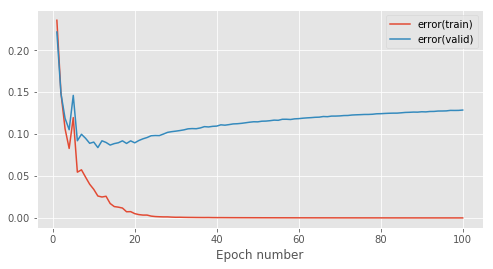

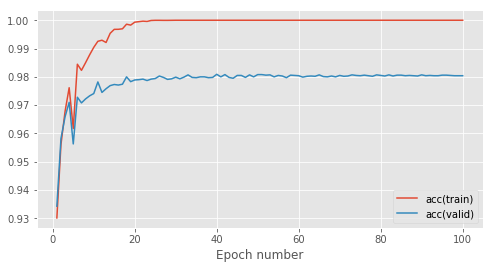

In [26]:
# ReLu 3 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_3, keys, run_time, fig_1_ReLu_3, ax_1, fig_2_ReLu_3, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_3.savefig('error_ReLu_3_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_3.savefig('accuracy_ReLu_3_learning_rate_{}.pdf'.format(learning_rate))


----
#### ReLu 4 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1.8s to complete
    error(train)=2.20e-01, acc(train)=9.34e-01, error(valid)=2.05e-01, acc(valid)=9.39e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.5s to complete
    error(train)=1.38e-01, acc(train)=9.59e-01, error(valid)=1.47e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.9s to complete
    error(train)=1.00e-01, acc(train)=9.70e-01, error(valid)=1.14e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.7s to complete
    error(train)=8.24e-02, acc(train)=9.76e-01, error(valid)=1.11e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.4s to complete
    error(train)=7.21e-02, acc(train)=9.78e-01, error(valid)=1.05e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.3s to complete
    error(train)=5.38e-02, acc(train)=9.83e-01, error(valid)=9.31e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.3s to complete
    error(train)=5.16e-02, acc(train)=9.84e-01, error(valid)=1.01e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.1s to complete
    error(train)=3.61e-02, acc(train)=9.89e-01, error(valid)=9.32e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.5s to complete
    error(train)=2.94e-02, acc(train)=9.91e-01, error(valid)=8.81e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.7s to complete
    error(train)=2.54e-02, acc(train)=9.93e-01, error(valid)=8.65e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.5s to complete
    error(train)=3.28e-02, acc(train)=9.90e-01, error(valid)=1.14e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.1s to complete
    error(train)=2.22e-02, acc(train)=9.93e-01, error(valid)=9.90e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.8s to complete
    error(train)=2.28e-02, acc(train)=9.93e-01, error(valid)=1.05e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.7s to complete
    error(train)=1.29e-02, acc(train)=9.97e-01, error(valid)=9.58e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.8s to complete
    error(train)=1.26e-02, acc(train)=9.97e-01, error(valid)=9.61e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.8s to complete
    error(train)=1.11e-02, acc(train)=9.97e-01, error(valid)=1.02e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.7s to complete
    error(train)=1.12e-02, acc(train)=9.97e-01, error(valid)=1.03e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.7s to complete
    error(train)=5.86e-03, acc(train)=9.99e-01, error(valid)=9.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.7s to complete
    error(train)=3.83e-03, acc(train)=9.99e-01, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.6s to complete
    error(train)=4.16e-03, acc(train)=9.99e-01, error(valid)=9.99e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.8s to complete
    error(train)=3.57e-03, acc(train)=9.99e-01, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.4s to complete
    error(train)=2.30e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.4s to complete
    error(train)=8.57e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.7s to complete
    error(train)=6.67e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.5s to complete
    error(train)=6.12e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.4s to complete
    error(train)=4.85e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.4s to complete
    error(train)=4.24e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.4s to complete
    error(train)=4.06e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.7s to complete
    error(train)=3.73e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.7s to complete
    error(train)=3.33e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.6s to complete
    error(train)=3.12e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.5s to complete
    error(train)=2.94e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.7s to complete
    error(train)=2.72e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.5s to complete
    error(train)=2.57e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.6s to complete
    error(train)=2.41e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.5s to complete
    error(train)=2.31e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.4s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.6s to complete
    error(train)=2.09e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.4s to complete
    error(train)=1.99e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 1.4s to complete
    error(train)=1.91e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 1.4s to complete
    error(train)=1.84e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.4s to complete
    error(train)=1.76e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.4s to complete
    error(train)=1.76e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.5s to complete
    error(train)=1.62e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.4s to complete
    error(train)=1.59e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.6s to complete
    error(train)=1.55e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.7s to complete
    error(train)=1.49e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.4s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.7s to complete
    error(train)=1.39e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.6s to complete
    error(train)=1.32e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.6s to complete
    error(train)=1.29e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.7s to complete
    error(train)=1.25e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.9s to complete
    error(train)=1.21e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.0s to complete
    error(train)=1.18e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.5s to complete
    error(train)=1.14e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.0s to complete
    error(train)=1.12e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.8s to complete
    error(train)=1.09e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.8s to complete
    error(train)=1.06e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.8s to complete
    error(train)=1.03e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.7s to complete
    error(train)=1.01e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.0s to complete
    error(train)=9.84e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.0s to complete
    error(train)=9.56e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.4s to complete
    error(train)=9.34e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.8s to complete
    error(train)=9.16e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.8s to complete
    error(train)=8.94e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.7s to complete
    error(train)=8.72e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.8s to complete
    error(train)=8.54e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.5s to complete
    error(train)=8.34e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.5s to complete
    error(train)=8.17e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.8s to complete
    error(train)=8.06e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.8s to complete
    error(train)=7.86e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.9s to complete
    error(train)=7.72e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.5s to complete
    error(train)=7.55e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.6s to complete
    error(train)=7.45e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.8s to complete
    error(train)=7.28e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.1s to complete
    error(train)=7.19e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.4s to complete
    error(train)=7.00e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.4s to complete
    error(train)=6.88e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.2s to complete
    error(train)=6.77e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.5s to complete
    error(train)=6.66e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.1s to complete
    error(train)=6.54e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.2s to complete
    error(train)=6.44e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.4s to complete
    error(train)=6.32e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.9s to complete
    error(train)=6.25e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.3s to complete
    error(train)=6.17e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.1s to complete
    error(train)=6.01e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.1s to complete
    error(train)=6.02e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.8s to complete
    error(train)=5.87e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.8s to complete
    error(train)=5.75e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.5s to complete
    error(train)=5.67e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.9s to complete
    error(train)=5.58e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.9s to complete
    error(train)=5.54e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.9s to complete
    error(train)=5.41e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.5s to complete
    error(train)=5.35e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.8s to complete
    error(train)=5.26e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.6s to complete
    error(train)=5.19e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.8s to complete
    error(train)=5.11e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.8s to complete
    error(train)=5.04e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.5s to complete
    error(train)=4.97e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.8s to complete
    error(train)=4.91e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


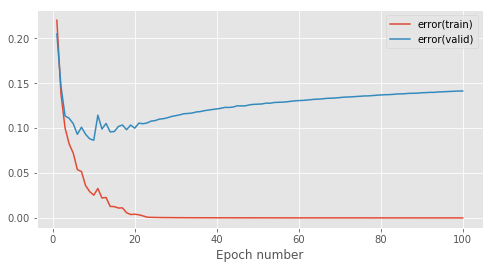

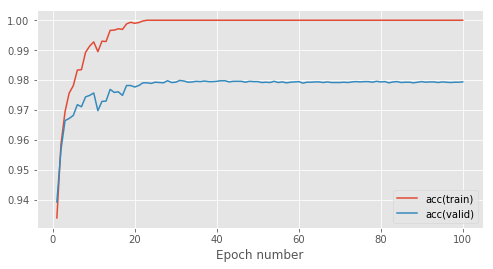

In [25]:
# ReLu 4 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_4, keys, run_time, fig_1_ReLu_4, ax_1, fig_2_ReLu_4, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_4.savefig('error_ReLu_4_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_4.savefig('accuracy_ReLu_4_learning_rate_{}.pdf'.format(learning_rate))


----
#### ReLu 5 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.2s to complete
    error(train)=1.98e-01, acc(train)=9.41e-01, error(valid)=1.93e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.1s to complete
    error(train)=1.40e-01, acc(train)=9.56e-01, error(valid)=1.46e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.9s to complete
    error(train)=1.00e-01, acc(train)=9.70e-01, error(valid)=1.23e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.9s to complete
    error(train)=6.45e-02, acc(train)=9.81e-01, error(valid)=9.84e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.9s to complete
    error(train)=6.98e-02, acc(train)=9.78e-01, error(valid)=1.10e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.6s to complete
    error(train)=6.07e-02, acc(train)=9.80e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.8s to complete
    error(train)=4.18e-02, acc(train)=9.87e-01, error(valid)=9.87e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.8s to complete
    error(train)=3.68e-02, acc(train)=9.89e-01, error(valid)=9.98e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.9s to complete
    error(train)=2.93e-02, acc(train)=9.91e-01, error(valid)=9.20e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.8s to complete
    error(train)=2.55e-02, acc(train)=9.92e-01, error(valid)=9.98e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.9s to complete
    error(train)=2.72e-02, acc(train)=9.91e-01, error(valid)=1.01e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1.8s to complete
    error(train)=2.06e-02, acc(train)=9.94e-01, error(valid)=1.02e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.1s to complete
    error(train)=1.43e-02, acc(train)=9.96e-01, error(valid)=1.06e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.9s to complete
    error(train)=1.74e-02, acc(train)=9.94e-01, error(valid)=1.07e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.6s to complete
    error(train)=1.42e-02, acc(train)=9.96e-01, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.4s to complete
    error(train)=9.10e-03, acc(train)=9.97e-01, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.6s to complete
    error(train)=1.19e-02, acc(train)=9.96e-01, error(valid)=1.15e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.9s to complete
    error(train)=1.04e-02, acc(train)=9.96e-01, error(valid)=1.22e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.5s to complete
    error(train)=2.39e-02, acc(train)=9.92e-01, error(valid)=1.31e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.6s to complete
    error(train)=1.04e-02, acc(train)=9.97e-01, error(valid)=1.19e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.9s to complete
    error(train)=2.69e-03, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.3s to complete
    error(train)=1.46e-03, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.1s to complete
    error(train)=1.54e-03, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.9s to complete
    error(train)=5.72e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.7s to complete
    error(train)=3.89e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.6s to complete
    error(train)=2.95e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.6s to complete
    error(train)=2.45e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.6s to complete
    error(train)=2.15e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.9s to complete
    error(train)=1.91e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.9s to complete
    error(train)=1.79e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.6s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.9s to complete
    error(train)=1.47e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.9s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.5s to complete
    error(train)=1.29e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.9s to complete
    error(train)=1.20e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.9s to complete
    error(train)=1.13e-04, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.8s to complete
    error(train)=1.06e-04, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.6s to complete
    error(train)=1.00e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.0s to complete
    error(train)=9.54e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 1.9s to complete
    error(train)=9.12e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.0s to complete
    error(train)=8.65e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.9s to complete
    error(train)=8.45e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.9s to complete
    error(train)=7.98e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.9s to complete
    error(train)=7.63e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.0s to complete
    error(train)=7.31e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.9s to complete
    error(train)=7.03e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.9s to complete
    error(train)=6.80e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.8s to complete
    error(train)=6.56e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.6s to complete
    error(train)=6.35e-05, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.9s to complete
    error(train)=6.15e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.6s to complete
    error(train)=5.96e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.0s to complete
    error(train)=5.74e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.8s to complete
    error(train)=5.61e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.6s to complete
    error(train)=5.43e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.9s to complete
    error(train)=5.26e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.6s to complete
    error(train)=5.10e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.0s to complete
    error(train)=4.97e-05, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.8s to complete
    error(train)=4.87e-05, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.7s to complete
    error(train)=4.71e-05, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.0s to complete
    error(train)=4.60e-05, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.1s to complete
    error(train)=4.48e-05, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.5s to complete
    error(train)=4.37e-05, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.1s to complete
    error(train)=4.32e-05, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.0s to complete
    error(train)=4.17e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.1s to complete
    error(train)=4.09e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.6s to complete
    error(train)=3.99e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.5s to complete
    error(train)=3.90e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.0s to complete
    error(train)=3.83e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.0s to complete
    error(train)=3.74e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.7s to complete
    error(train)=3.67e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.7s to complete
    error(train)=3.60e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.7s to complete
    error(train)=3.54e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.1s to complete
    error(train)=3.46e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.7s to complete
    error(train)=3.38e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.2s to complete
    error(train)=3.31e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.4s to complete
    error(train)=3.25e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.7s to complete
    error(train)=3.19e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.3s to complete
    error(train)=3.13e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.0s to complete
    error(train)=3.07e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.9s to complete
    error(train)=3.02e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.5s to complete
    error(train)=2.96e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.2s to complete
    error(train)=2.91e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.4s to complete
    error(train)=2.87e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.5s to complete
    error(train)=2.82e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.5s to complete
    error(train)=2.77e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.3s to complete
    error(train)=2.73e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.3s to complete
    error(train)=2.69e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.4s to complete
    error(train)=2.64e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.9s to complete
    error(train)=2.61e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.1s to complete
    error(train)=2.56e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.2s to complete
    error(train)=2.52e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.2s to complete
    error(train)=2.48e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.3s to complete
    error(train)=2.45e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.4s to complete
    error(train)=2.41e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.4s to complete
    error(train)=2.38e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.3s to complete
    error(train)=2.35e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.2s to complete
    error(train)=2.31e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.9s to complete
    error(train)=2.28e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.2s to complete
    error(train)=2.25e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.1s to complete
    error(train)=2.22e-05, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


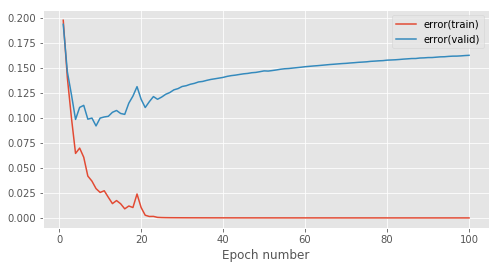

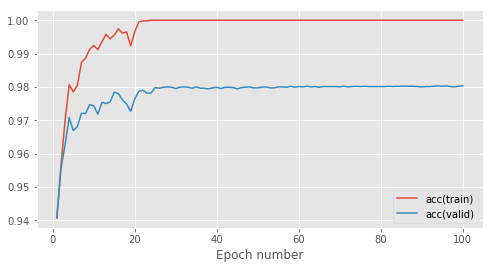

In [27]:
# ReLu 5 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_5, keys, run_time, fig_1_ReLu_5, ax_1, fig_2_ReLu_5, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_5.savefig('error_ReLu_5_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_5.savefig('accuracy_ReLu_5_learning_rate_{}.pdf'.format(learning_rate))


----
#### ReLu 6 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.2s to complete
    error(train)=2.38e-01, acc(train)=9.27e-01, error(valid)=2.27e-01, acc(valid)=9.30e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.5s to complete
    error(train)=1.22e-01, acc(train)=9.63e-01, error(valid)=1.32e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.6s to complete
    error(train)=9.47e-02, acc(train)=9.72e-01, error(valid)=1.16e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.8s to complete
    error(train)=8.69e-02, acc(train)=9.73e-01, error(valid)=1.28e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.4s to complete
    error(train)=5.93e-02, acc(train)=9.83e-01, error(valid)=9.38e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.6s to complete
    error(train)=4.22e-02, acc(train)=9.87e-01, error(valid)=8.73e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.5s to complete
    error(train)=5.70e-02, acc(train)=9.82e-01, error(valid)=1.05e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.8s to complete
    error(train)=3.25e-02, acc(train)=9.90e-01, error(valid)=9.24e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.8s to complete
    error(train)=3.72e-02, acc(train)=9.88e-01, error(valid)=1.03e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.1s to complete
    error(train)=2.77e-02, acc(train)=9.91e-01, error(valid)=9.93e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.5s to complete
    error(train)=2.29e-02, acc(train)=9.93e-01, error(valid)=9.74e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.9s to complete
    error(train)=2.02e-02, acc(train)=9.93e-01, error(valid)=1.00e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.5s to complete
    error(train)=1.65e-02, acc(train)=9.95e-01, error(valid)=8.58e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.4s to complete
    error(train)=1.41e-02, acc(train)=9.96e-01, error(valid)=9.41e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.6s to complete
    error(train)=1.20e-02, acc(train)=9.96e-01, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.4s to complete
    error(train)=1.65e-02, acc(train)=9.95e-01, error(valid)=1.01e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.5s to complete
    error(train)=7.66e-03, acc(train)=9.98e-01, error(valid)=9.78e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.4s to complete
    error(train)=9.59e-03, acc(train)=9.97e-01, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.8s to complete
    error(train)=1.21e-02, acc(train)=9.96e-01, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.3s to complete
    error(train)=1.23e-02, acc(train)=9.96e-01, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.9s to complete
    error(train)=4.98e-03, acc(train)=9.99e-01, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.3s to complete
    error(train)=7.73e-03, acc(train)=9.98e-01, error(valid)=1.13e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.8s to complete
    error(train)=2.05e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.4s to complete
    error(train)=1.18e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.5s to complete
    error(train)=6.98e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.5s to complete
    error(train)=5.38e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.5s to complete
    error(train)=4.60e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.3s to complete
    error(train)=3.86e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.5s to complete
    error(train)=3.26e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.4s to complete
    error(train)=2.68e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.3s to complete
    error(train)=2.57e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.6s to complete
    error(train)=2.07e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.3s to complete
    error(train)=1.75e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.2s to complete
    error(train)=1.54e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.3s to complete
    error(train)=1.69e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.5s to complete
    error(train)=1.23e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.5s to complete
    error(train)=1.10e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.5s to complete
    error(train)=9.71e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.3s to complete
    error(train)=8.94e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.2s to complete
    error(train)=8.21e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.3s to complete
    error(train)=7.57e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.4s to complete
    error(train)=7.09e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.0s to complete
    error(train)=6.58e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.5s to complete
    error(train)=6.15e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.5s to complete
    error(train)=5.80e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.4s to complete
    error(train)=5.48e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.0s to complete
    error(train)=5.27e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.6s to complete
    error(train)=4.94e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.5s to complete
    error(train)=4.66e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.4s to complete
    error(train)=4.41e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.5s to complete
    error(train)=4.23e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.3s to complete
    error(train)=4.02e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.6s to complete
    error(train)=3.85e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.8s to complete
    error(train)=3.70e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.5s to complete
    error(train)=3.55e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.8s to complete
    error(train)=3.40e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.7s to complete
    error(train)=3.27e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.9s to complete
    error(train)=3.14e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.1s to complete
    error(train)=3.03e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.3s to complete
    error(train)=2.92e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.4s to complete
    error(train)=2.82e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.0s to complete
    error(train)=2.73e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.2s to complete
    error(train)=2.64e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.2s to complete
    error(train)=2.57e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.2s to complete
    error(train)=2.49e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.6s to complete
    error(train)=2.42e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.0s to complete
    error(train)=2.35e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.5s to complete
    error(train)=2.29e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.2s to complete
    error(train)=2.24e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.9s to complete
    error(train)=2.17e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.3s to complete
    error(train)=2.12e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.0s to complete
    error(train)=2.07e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.8s to complete
    error(train)=2.02e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.5s to complete
    error(train)=1.97e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.3s to complete
    error(train)=1.93e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.3s to complete
    error(train)=1.89e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.7s to complete
    error(train)=1.85e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.4s to complete
    error(train)=1.81e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.1s to complete
    error(train)=1.77e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.1s to complete
    error(train)=1.73e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.3s to complete
    error(train)=1.70e-05, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.6s to complete
    error(train)=1.67e-05, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.6s to complete
    error(train)=1.64e-05, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.8s to complete
    error(train)=1.60e-05, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.5s to complete
    error(train)=1.57e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.5s to complete
    error(train)=1.54e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.5s to complete
    error(train)=1.52e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.5s to complete
    error(train)=1.49e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.5s to complete
    error(train)=1.46e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.4s to complete
    error(train)=1.44e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.4s to complete
    error(train)=1.42e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.1s to complete
    error(train)=1.39e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.8s to complete
    error(train)=1.37e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.4s to complete
    error(train)=1.35e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.4s to complete
    error(train)=1.33e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.8s to complete
    error(train)=1.31e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.1s to complete
    error(train)=1.29e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.8s to complete
    error(train)=1.27e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.7s to complete
    error(train)=1.25e-05, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.3s to complete
    error(train)=1.23e-05, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


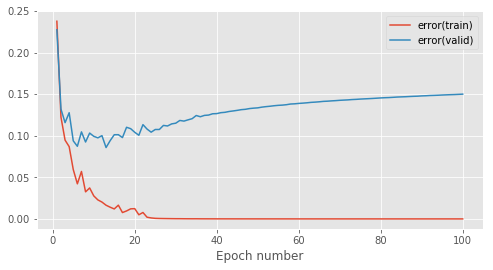

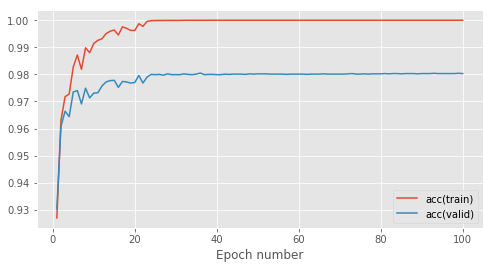

In [28]:
# ReLu 6 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_6, keys, run_time, fig_1_ReLu_6, ax_1, fig_2_ReLu_6, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_6.savefig('error_ReLu_6_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_6.savefig('accuracy_ReLu_6_learning_rate_{}.pdf'.format(learning_rate))


----
#### ReLu 7 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.4s to complete
    error(train)=1.95e-01, acc(train)=9.41e-01, error(valid)=1.89e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.6s to complete
    error(train)=1.80e-01, acc(train)=9.42e-01, error(valid)=1.94e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.7s to complete
    error(train)=1.13e-01, acc(train)=9.66e-01, error(valid)=1.42e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.2s to complete
    error(train)=8.05e-02, acc(train)=9.74e-01, error(valid)=1.14e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.2s to complete
    error(train)=7.77e-02, acc(train)=9.76e-01, error(valid)=1.16e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.4s to complete
    error(train)=6.18e-02, acc(train)=9.81e-01, error(valid)=1.13e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.3s to complete
    error(train)=4.89e-02, acc(train)=9.85e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.3s to complete
    error(train)=3.30e-02, acc(train)=9.90e-01, error(valid)=9.47e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.4s to complete
    error(train)=2.86e-02, acc(train)=9.91e-01, error(valid)=9.01e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.1s to complete
    error(train)=3.17e-02, acc(train)=9.91e-01, error(valid)=1.05e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.2s to complete
    error(train)=3.27e-02, acc(train)=9.89e-01, error(valid)=1.09e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.3s to complete
    error(train)=1.80e-02, acc(train)=9.94e-01, error(valid)=1.00e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.4s to complete
    error(train)=2.37e-02, acc(train)=9.92e-01, error(valid)=1.15e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.4s to complete
    error(train)=1.67e-02, acc(train)=9.95e-01, error(valid)=1.12e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.1s to complete
    error(train)=2.06e-02, acc(train)=9.93e-01, error(valid)=1.16e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.0s to complete
    error(train)=1.21e-02, acc(train)=9.96e-01, error(valid)=1.18e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.0s to complete
    error(train)=8.81e-03, acc(train)=9.97e-01, error(valid)=1.21e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.3s to complete
    error(train)=8.52e-03, acc(train)=9.97e-01, error(valid)=1.19e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.0s to complete
    error(train)=1.25e-02, acc(train)=9.96e-01, error(valid)=1.43e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.4s to complete
    error(train)=1.10e-02, acc(train)=9.96e-01, error(valid)=1.26e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.3s to complete
    error(train)=5.95e-03, acc(train)=9.98e-01, error(valid)=1.16e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.4s to complete
    error(train)=7.51e-03, acc(train)=9.98e-01, error(valid)=1.21e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.3s to complete
    error(train)=3.97e-03, acc(train)=9.99e-01, error(valid)=1.20e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.2s to complete
    error(train)=1.21e-02, acc(train)=9.96e-01, error(valid)=1.42e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.1s to complete
    error(train)=2.88e-02, acc(train)=9.92e-01, error(valid)=1.52e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=1.54e-02, acc(train)=9.95e-01, error(valid)=1.54e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.1s to complete
    error(train)=1.03e-02, acc(train)=9.97e-01, error(valid)=1.26e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.3s to complete
    error(train)=1.58e-02, acc(train)=9.94e-01, error(valid)=1.42e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.0s to complete
    error(train)=6.97e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.4s to complete
    error(train)=3.41e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.3s to complete
    error(train)=1.45e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.3s to complete
    error(train)=1.10e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.3s to complete
    error(train)=9.10e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.2s to complete
    error(train)=7.79e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.3s to complete
    error(train)=6.83e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.4s to complete
    error(train)=6.11e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.3s to complete
    error(train)=5.47e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.4s to complete
    error(train)=4.98e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.0s to complete
    error(train)=4.57e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.0s to complete
    error(train)=4.23e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.0s to complete
    error(train)=3.92e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.4s to complete
    error(train)=3.66e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.4s to complete
    error(train)=3.44e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.1s to complete
    error(train)=3.23e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.3s to complete
    error(train)=3.05e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.5s to complete
    error(train)=2.89e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.6s to complete
    error(train)=2.75e-05, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.4s to complete
    error(train)=2.61e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.4s to complete
    error(train)=2.49e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.9s to complete
    error(train)=2.38e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.4s to complete
    error(train)=2.28e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.0s to complete
    error(train)=2.19e-05, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.0s to complete
    error(train)=2.10e-05, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.0s to complete
    error(train)=2.02e-05, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.0s to complete
    error(train)=1.95e-05, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.0s to complete
    error(train)=1.88e-05, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.0s to complete
    error(train)=1.81e-05, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.4s to complete
    error(train)=1.75e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.4s to complete
    error(train)=1.70e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.4s to complete
    error(train)=1.64e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.4s to complete
    error(train)=1.59e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.3s to complete
    error(train)=1.55e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.4s to complete
    error(train)=1.50e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.4s to complete
    error(train)=1.46e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.3s to complete
    error(train)=1.42e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.4s to complete
    error(train)=1.38e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.5s to complete
    error(train)=1.34e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.2s to complete
    error(train)=1.31e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.3s to complete
    error(train)=1.28e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.1s to complete
    error(train)=1.25e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.2s to complete
    error(train)=1.22e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.3s to complete
    error(train)=1.19e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.1s to complete
    error(train)=1.16e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.3s to complete
    error(train)=1.14e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.0s to complete
    error(train)=1.11e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.1s to complete
    error(train)=1.09e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.5s to complete
    error(train)=1.07e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.1s to complete
    error(train)=1.04e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.1s to complete
    error(train)=1.02e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.5s to complete
    error(train)=1.00e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.4s to complete
    error(train)=9.82e-06, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.5s to complete
    error(train)=9.63e-06, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.3s to complete
    error(train)=9.45e-06, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.2s to complete
    error(train)=9.27e-06, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.5s to complete
    error(train)=9.10e-06, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.4s to complete
    error(train)=8.94e-06, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.4s to complete
    error(train)=8.78e-06, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.4s to complete
    error(train)=8.62e-06, acc(train)=1.00e+00, error(valid)=1.64e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.4s to complete
    error(train)=8.48e-06, acc(train)=1.00e+00, error(valid)=1.64e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.5s to complete
    error(train)=8.33e-06, acc(train)=1.00e+00, error(valid)=1.64e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.4s to complete
    error(train)=8.20e-06, acc(train)=1.00e+00, error(valid)=1.64e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.5s to complete
    error(train)=8.06e-06, acc(train)=1.00e+00, error(valid)=1.65e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.5s to complete
    error(train)=7.93e-06, acc(train)=1.00e+00, error(valid)=1.65e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.5s to complete
    error(train)=7.80e-06, acc(train)=1.00e+00, error(valid)=1.65e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.1s to complete
    error(train)=7.68e-06, acc(train)=1.00e+00, error(valid)=1.65e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.0s to complete
    error(train)=7.56e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.4s to complete
    error(train)=7.45e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.3s to complete
    error(train)=7.34e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.5s to complete
    error(train)=7.23e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.4s to complete
    error(train)=7.12e-06, acc(train)=1.00e+00, error(valid)=1.67e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


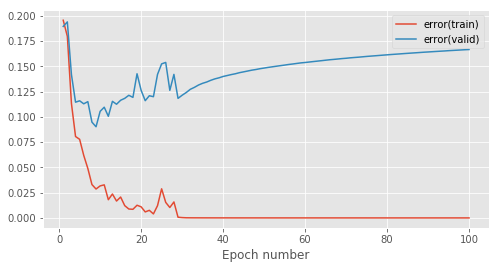

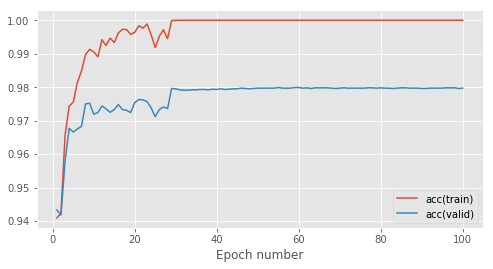

In [24]:
# ReLu 7 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_7, keys, run_time, fig_1_ReLu_7, ax_1, fig_2_ReLu_7, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_7.savefig('error_ReLu_7_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_7.savefig('accuracy_ReLu_7_learning_rate_{}.pdf'.format(learning_rate))


----
#### ReLu 8 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.9s to complete
    error(train)=2.15e-01, acc(train)=9.35e-01, error(valid)=2.06e-01, acc(valid)=9.37e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.3s to complete
    error(train)=1.89e-01, acc(train)=9.41e-01, error(valid)=1.94e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.5s to complete
    error(train)=9.75e-02, acc(train)=9.70e-01, error(valid)=1.26e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.2s to complete
    error(train)=6.67e-02, acc(train)=9.80e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.1s to complete
    error(train)=8.42e-02, acc(train)=9.74e-01, error(valid)=1.28e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.3s to complete
    error(train)=5.45e-02, acc(train)=9.84e-01, error(valid)=1.06e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.2s to complete
    error(train)=4.07e-02, acc(train)=9.88e-01, error(valid)=1.03e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.1s to complete
    error(train)=3.21e-02, acc(train)=9.91e-01, error(valid)=9.65e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.1s to complete
    error(train)=2.95e-02, acc(train)=9.92e-01, error(valid)=9.97e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.9s to complete
    error(train)=1.98e-02, acc(train)=9.95e-01, error(valid)=9.50e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.0s to complete
    error(train)=2.15e-02, acc(train)=9.94e-01, error(valid)=1.01e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.6s to complete
    error(train)=2.28e-02, acc(train)=9.93e-01, error(valid)=1.05e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.6s to complete
    error(train)=1.82e-02, acc(train)=9.95e-01, error(valid)=1.10e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.6s to complete
    error(train)=1.51e-02, acc(train)=9.95e-01, error(valid)=1.12e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.2s to complete
    error(train)=1.84e-02, acc(train)=9.94e-01, error(valid)=1.06e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.3s to complete
    error(train)=2.43e-02, acc(train)=9.92e-01, error(valid)=1.22e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.0s to complete
    error(train)=3.07e-02, acc(train)=9.90e-01, error(valid)=1.34e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.5s to complete
    error(train)=2.22e-02, acc(train)=9.92e-01, error(valid)=1.36e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.4s to complete
    error(train)=7.44e-03, acc(train)=9.98e-01, error(valid)=1.12e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.0s to complete
    error(train)=1.24e-02, acc(train)=9.96e-01, error(valid)=1.24e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.6s to complete
    error(train)=3.18e-02, acc(train)=9.91e-01, error(valid)=1.65e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.6s to complete
    error(train)=8.23e-03, acc(train)=9.97e-01, error(valid)=1.10e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.5s to complete
    error(train)=4.22e-03, acc(train)=9.99e-01, error(valid)=1.25e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.1s to complete
    error(train)=1.62e-02, acc(train)=9.95e-01, error(valid)=1.32e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.9s to complete
    error(train)=3.84e-03, acc(train)=9.99e-01, error(valid)=1.07e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.7s to complete
    error(train)=2.47e-03, acc(train)=9.99e-01, error(valid)=1.31e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.3s to complete
    error(train)=2.82e-03, acc(train)=9.99e-01, error(valid)=1.32e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.7s to complete
    error(train)=1.72e-03, acc(train)=9.99e-01, error(valid)=1.32e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.2s to complete
    error(train)=1.20e-02, acc(train)=9.96e-01, error(valid)=1.39e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.2s to complete
    error(train)=1.21e-02, acc(train)=9.96e-01, error(valid)=1.32e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.0s to complete
    error(train)=5.51e-03, acc(train)=9.98e-01, error(valid)=1.36e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.5s to complete
    error(train)=7.85e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.8s to complete
    error(train)=4.65e-03, acc(train)=9.99e-01, error(valid)=1.34e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.5s to complete
    error(train)=3.30e-03, acc(train)=9.99e-01, error(valid)=1.40e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.3s to complete
    error(train)=3.48e-03, acc(train)=9.99e-01, error(valid)=1.19e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.1s to complete
    error(train)=9.44e-03, acc(train)=9.98e-01, error(valid)=1.46e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.7s to complete
    error(train)=2.29e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.0s to complete
    error(train)=1.47e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.7s to complete
    error(train)=7.50e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.8s to complete
    error(train)=5.93e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.0s to complete
    error(train)=4.94e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.2s to complete
    error(train)=4.24e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.6s to complete
    error(train)=3.72e-05, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.3s to complete
    error(train)=3.31e-05, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.3s to complete
    error(train)=2.98e-05, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.6s to complete
    error(train)=2.70e-05, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.7s to complete
    error(train)=2.47e-05, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.4s to complete
    error(train)=2.28e-05, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.1s to complete
    error(train)=2.11e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.0s to complete
    error(train)=1.97e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.3s to complete
    error(train)=1.85e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 1.9s to complete
    error(train)=1.73e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.0s to complete
    error(train)=1.64e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.9s to complete
    error(train)=1.55e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.8s to complete
    error(train)=1.47e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.9s to complete
    error(train)=1.40e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.1s to complete
    error(train)=1.34e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.1s to complete
    error(train)=1.28e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.7s to complete
    error(train)=1.22e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.7s to complete
    error(train)=1.17e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.8s to complete
    error(train)=1.13e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.0s to complete
    error(train)=1.08e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.2s to complete
    error(train)=1.04e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.9s to complete
    error(train)=1.01e-05, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.8s to complete
    error(train)=9.72e-06, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.8s to complete
    error(train)=9.40e-06, acc(train)=1.00e+00, error(valid)=1.64e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.7s to complete
    error(train)=9.10e-06, acc(train)=1.00e+00, error(valid)=1.64e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.7s to complete
    error(train)=8.81e-06, acc(train)=1.00e+00, error(valid)=1.65e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.3s to complete
    error(train)=8.54e-06, acc(train)=1.00e+00, error(valid)=1.65e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.7s to complete
    error(train)=8.29e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.7s to complete
    error(train)=8.05e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.7s to complete
    error(train)=7.82e-06, acc(train)=1.00e+00, error(valid)=1.66e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.7s to complete
    error(train)=7.61e-06, acc(train)=1.00e+00, error(valid)=1.67e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.7s to complete
    error(train)=7.40e-06, acc(train)=1.00e+00, error(valid)=1.67e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.7s to complete
    error(train)=7.21e-06, acc(train)=1.00e+00, error(valid)=1.68e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.4s to complete
    error(train)=7.03e-06, acc(train)=1.00e+00, error(valid)=1.68e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.0s to complete
    error(train)=6.85e-06, acc(train)=1.00e+00, error(valid)=1.68e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.2s to complete
    error(train)=6.68e-06, acc(train)=1.00e+00, error(valid)=1.69e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.0s to complete
    error(train)=6.53e-06, acc(train)=1.00e+00, error(valid)=1.69e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.5s to complete
    error(train)=6.37e-06, acc(train)=1.00e+00, error(valid)=1.69e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.2s to complete
    error(train)=6.23e-06, acc(train)=1.00e+00, error(valid)=1.70e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.7s to complete
    error(train)=6.09e-06, acc(train)=1.00e+00, error(valid)=1.70e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.7s to complete
    error(train)=5.96e-06, acc(train)=1.00e+00, error(valid)=1.70e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.7s to complete
    error(train)=5.83e-06, acc(train)=1.00e+00, error(valid)=1.71e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.7s to complete
    error(train)=5.71e-06, acc(train)=1.00e+00, error(valid)=1.71e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.7s to complete
    error(train)=5.59e-06, acc(train)=1.00e+00, error(valid)=1.71e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.9s to complete
    error(train)=5.48e-06, acc(train)=1.00e+00, error(valid)=1.72e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.8s to complete
    error(train)=5.37e-06, acc(train)=1.00e+00, error(valid)=1.72e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.7s to complete
    error(train)=5.26e-06, acc(train)=1.00e+00, error(valid)=1.72e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.7s to complete
    error(train)=5.16e-06, acc(train)=1.00e+00, error(valid)=1.72e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.7s to complete
    error(train)=5.06e-06, acc(train)=1.00e+00, error(valid)=1.73e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.7s to complete
    error(train)=4.97e-06, acc(train)=1.00e+00, error(valid)=1.73e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.7s to complete
    error(train)=4.88e-06, acc(train)=1.00e+00, error(valid)=1.73e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.7s to complete
    error(train)=4.79e-06, acc(train)=1.00e+00, error(valid)=1.73e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.1s to complete
    error(train)=4.71e-06, acc(train)=1.00e+00, error(valid)=1.74e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.7s to complete
    error(train)=4.63e-06, acc(train)=1.00e+00, error(valid)=1.74e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.7s to complete
    error(train)=4.55e-06, acc(train)=1.00e+00, error(valid)=1.74e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.7s to complete
    error(train)=4.47e-06, acc(train)=1.00e+00, error(valid)=1.74e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.7s to complete
    error(train)=4.40e-06, acc(train)=1.00e+00, error(valid)=1.75e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.7s to complete
    error(train)=4.32e-06, acc(train)=1.00e+00, error(valid)=1.75e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


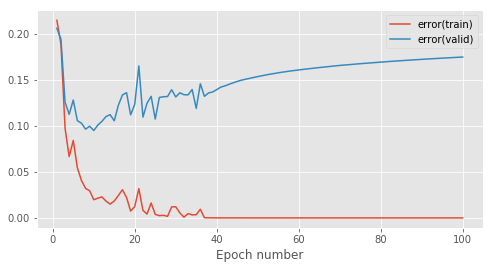

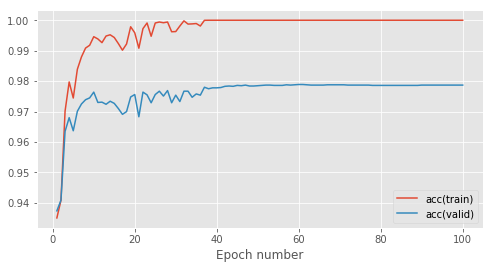

In [30]:
# ReLu 8 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_ReLu_8, keys, run_time, fig_1_ReLu_8, ax_1, fig_2_ReLu_8, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_ReLu_8.savefig('error_ReLu_8_learning_rate_{}.pdf'.format(learning_rate))
fig_2_ReLu_8.savefig('accuracy_ReLu_8_learning_rate_{}.pdf'.format(learning_rate))

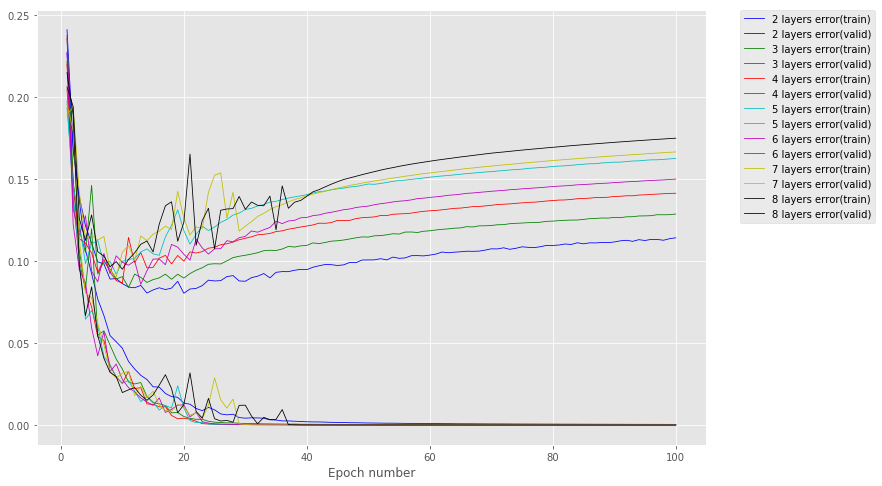

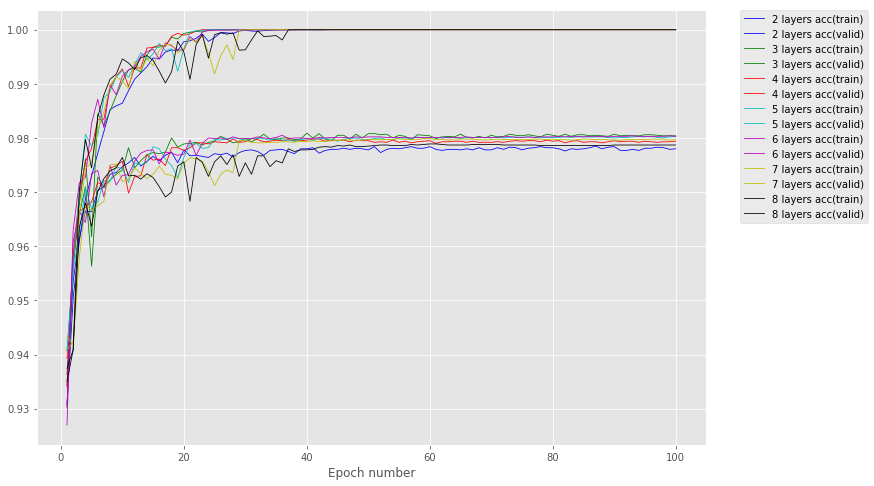

In [55]:
# Plot the change in the validation and training set error over training.
fig_1_all_layers = plt.figure(figsize=(12, 8))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plot_list = [stats_ReLu_2,stats_ReLu_3,stats_ReLu_4,stats_ReLu_5,stats_ReLu_6,stats_ReLu_7,stats_ReLu_8]

ax_1 = fig_1_all_layers.add_subplot(111)

for i,s in enumerate(plot_list):
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, s.shape[0]) * stats_interval, 
              s[1:, keys[k]], label=str(str(i+2)+" layers "+k),color=color[i],linewidth=0.8)

ax_1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_1.set_xlabel('Epoch number')

# Plot the change in the validation and training set accuracy over training.
fig_2_all_layers = plt.figure(figsize=(12, 8))
ax_2 = fig_2_all_layers.add_subplot(111)
for i,s in enumerate(plot_list):
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, s.shape[0]) * stats_interval, 
              s[1:, keys[k]], label=str(str(i+2)+" layers "+k),color=color[i],linewidth=0.8)
ax_2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_2.set_xlabel('Epoch number')

fig_1_all_layers.savefig('error_ReLu_2-8.pdf',bbox_inches = "tight")
fig_2_all_layers.savefig('accuracy_ReLu_2-8.pdf',bbox_inches = "tight" )

#### 2B.2
Also compare the effect of different initialisation strategies, as discussed in lecture 4
##### 2B.2.1 
First look at the effect of weight initialisation based on “GlorotInit” (“Xavier initialisation”)
##### 2B.2.2
Additionally, in particular you might like to explore initialising a SELU layer drawing from a Gaussian with mean 0 and variance 1/n out as recommended by Klambauer et al. [2017].
###### Use Fan-in for SELU 2 hidden layers

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.5s to complete
    error(train)=2.09e-01, acc(train)=9.39e-01, error(valid)=2.01e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.3s to complete
    error(train)=1.47e-01, acc(train)=9.57e-01, error(valid)=1.54e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.2s to complete
    error(train)=1.15e-01, acc(train)=9.66e-01, error(valid)=1.29e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.3s to complete
    error(train)=9.78e-02, acc(train)=9.71e-01, error(valid)=1.19e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.4s to complete
    error(train)=8.40e-02, acc(train)=9.75e-01, error(valid)=1.14e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.3s to complete
    error(train)=7.55e-02, acc(train)=9.78e-01, error(valid)=1.10e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.1s to complete
    error(train)=6.43e-02, acc(train)=9.81e-01, error(valid)=1.03e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.2s to complete
    error(train)=5.31e-02, acc(train)=9.85e-01, error(valid)=9.58e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.1s to complete
    error(train)=4.74e-02, acc(train)=9.86e-01, error(valid)=9.35e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.3s to complete
    error(train)=4.90e-02, acc(train)=9.86e-01, error(valid)=9.77e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.2s to complete
    error(train)=4.33e-02, acc(train)=9.87e-01, error(valid)=9.64e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.1s to complete
    error(train)=3.53e-02, acc(train)=9.91e-01, error(valid)=9.06e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.1s to complete
    error(train)=3.07e-02, acc(train)=9.92e-01, error(valid)=8.81e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.3s to complete
    error(train)=3.00e-02, acc(train)=9.93e-01, error(valid)=8.96e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.2s to complete
    error(train)=2.38e-02, acc(train)=9.95e-01, error(valid)=8.48e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.2s to complete
    error(train)=2.24e-02, acc(train)=9.95e-01, error(valid)=8.85e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.3s to complete
    error(train)=1.97e-02, acc(train)=9.96e-01, error(valid)=8.77e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.1s to complete
    error(train)=1.76e-02, acc(train)=9.97e-01, error(valid)=8.96e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.5s to complete
    error(train)=1.50e-02, acc(train)=9.97e-01, error(valid)=8.70e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.4s to complete
    error(train)=1.38e-02, acc(train)=9.98e-01, error(valid)=8.53e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.6s to complete
    error(train)=1.32e-02, acc(train)=9.98e-01, error(valid)=8.50e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.5s to complete
    error(train)=1.20e-02, acc(train)=9.98e-01, error(valid)=9.06e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.7s to complete
    error(train)=1.06e-02, acc(train)=9.99e-01, error(valid)=8.75e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.5s to complete
    error(train)=9.05e-03, acc(train)=9.99e-01, error(valid)=8.71e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.4s to complete
    error(train)=7.68e-03, acc(train)=9.99e-01, error(valid)=8.76e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.9s to complete
    error(train)=7.45e-03, acc(train)=9.99e-01, error(valid)=9.05e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.5s to complete
    error(train)=6.49e-03, acc(train)=1.00e+00, error(valid)=8.93e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.3s to complete
    error(train)=6.96e-03, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.3s to complete
    error(train)=5.75e-03, acc(train)=1.00e+00, error(valid)=9.21e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.2s to complete
    error(train)=5.11e-03, acc(train)=1.00e+00, error(valid)=9.03e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.2s to complete
    error(train)=4.56e-03, acc(train)=1.00e+00, error(valid)=9.23e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.2s to complete
    error(train)=4.36e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.2s to complete
    error(train)=4.00e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.4s to complete
    error(train)=3.82e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.3s to complete
    error(train)=3.54e-03, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.4s to complete
    error(train)=3.53e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.2s to complete
    error(train)=3.46e-03, acc(train)=1.00e+00, error(valid)=9.64e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.2s to complete
    error(train)=3.05e-03, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.4s to complete
    error(train)=2.76e-03, acc(train)=1.00e+00, error(valid)=9.67e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.3s to complete
    error(train)=2.61e-03, acc(train)=1.00e+00, error(valid)=9.65e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.4s to complete
    error(train)=2.61e-03, acc(train)=1.00e+00, error(valid)=9.84e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.8s to complete
    error(train)=2.37e-03, acc(train)=1.00e+00, error(valid)=9.83e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.3s to complete
    error(train)=2.24e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.3s to complete
    error(train)=2.13e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.4s to complete
    error(train)=2.07e-03, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.3s to complete
    error(train)=1.97e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.8s to complete
    error(train)=1.92e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.2s to complete
    error(train)=1.78e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.2s to complete
    error(train)=1.79e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.2s to complete
    error(train)=1.67e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.1s to complete
    error(train)=1.61e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.2s to complete
    error(train)=1.56e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.1s to complete
    error(train)=1.49e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.4s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.2s to complete
    error(train)=1.43e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.3s to complete
    error(train)=1.40e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.2s to complete
    error(train)=1.34e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.3s to complete
    error(train)=1.31e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.2s to complete
    error(train)=1.24e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.2s to complete
    error(train)=1.25e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.2s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 1.2s to complete
    error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.2s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.2s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.2s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.2s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.2s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.2s to complete
    error(train)=9.76e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.2s to complete
    error(train)=9.60e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.2s to complete
    error(train)=9.49e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.2s to complete
    error(train)=9.21e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.2s to complete
    error(train)=8.99e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.2s to complete
    error(train)=8.68e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.2s to complete
    error(train)=8.64e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.2s to complete
    error(train)=8.47e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.2s to complete
    error(train)=8.19e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.2s to complete
    error(train)=8.03e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.2s to complete
    error(train)=7.87e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.2s to complete
    error(train)=7.80e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.2s to complete
    error(train)=7.72e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.2s to complete
    error(train)=7.44e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.2s to complete
    error(train)=7.39e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.2s to complete
    error(train)=7.15e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.3s to complete
    error(train)=7.15e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.7s to complete
    error(train)=6.99e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.0s to complete
    error(train)=6.82e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.2s to complete
    error(train)=6.67e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.2s to complete
    error(train)=6.58e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.2s to complete
    error(train)=6.47e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.2s to complete
    error(train)=6.36e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.2s to complete
    error(train)=6.31e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.5s to complete
    error(train)=6.13e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.2s to complete
    error(train)=6.09e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.2s to complete
    error(train)=6.02e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.2s to complete
    error(train)=5.89e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.3s to complete
    error(train)=5.77e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.8s to complete
    error(train)=5.80e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.1s to complete
    error(train)=5.59e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.1s to complete
    error(train)=5.58e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.1s to complete
    error(train)=5.43e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


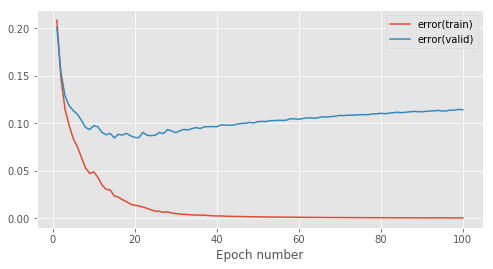

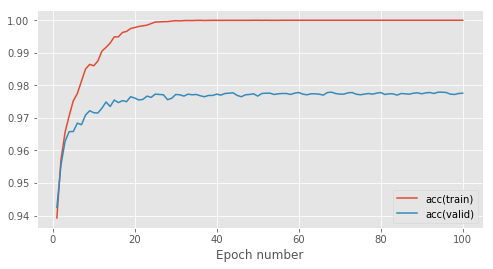

In [56]:
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit, Fan_in_UniformInit, Fan_out_UniformInit

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

# Use Fan-in for SELU 2 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = Fan_in_UniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_SELU_2_FanIn, keys, run_time, fig_1_SELU_2_FanIn, ax_1, fig_2_SELU_2_FanIn, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_SELU_2_FanIn.savefig('error_SELU_2_FanIn_learning_rate_{}.pdf'.format(learning_rate))
fig_2_SELU_2_FanIn.savefig('accuracy_SELU_2_FanIn_learning_rate_{}.pdf'.format(learning_rate))


----
##### Use Fan-out for (SELU 2 hidden layers)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.2s to complete
    error(train)=2.68e-01, acc(train)=9.23e-01, error(valid)=2.57e-01, acc(valid)=9.26e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.4s to complete
    error(train)=2.11e-01, acc(train)=9.39e-01, error(valid)=2.11e-01, acc(valid)=9.40e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.7s to complete
    error(train)=1.73e-01, acc(train)=9.50e-01, error(valid)=1.79e-01, acc(valid)=9.48e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.5s to complete
    error(train)=1.38e-01, acc(train)=9.60e-01, error(valid)=1.50e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.3s to complete
    error(train)=1.15e-01, acc(train)=9.67e-01, error(valid)=1.31e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.1s to complete
    error(train)=1.02e-01, acc(train)=9.70e-01, error(valid)=1.23e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.0s to complete
    error(train)=8.84e-02, acc(train)=9.74e-01, error(valid)=1.14e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.4s to complete
    error(train)=7.98e-02, acc(train)=9.77e-01, error(valid)=1.08e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.2s to complete
    error(train)=6.78e-02, acc(train)=9.80e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.2s to complete
    error(train)=6.24e-02, acc(train)=9.81e-01, error(valid)=9.76e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.0s to complete
    error(train)=6.00e-02, acc(train)=9.82e-01, error(valid)=9.69e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.3s to complete
    error(train)=5.15e-02, acc(train)=9.85e-01, error(valid)=9.37e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.6s to complete
    error(train)=4.84e-02, acc(train)=9.87e-01, error(valid)=8.82e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.5s to complete
    error(train)=4.01e-02, acc(train)=9.89e-01, error(valid)=8.69e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.4s to complete
    error(train)=3.87e-02, acc(train)=9.89e-01, error(valid)=8.64e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.2s to complete
    error(train)=3.72e-02, acc(train)=9.89e-01, error(valid)=8.98e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.3s to complete
    error(train)=3.05e-02, acc(train)=9.92e-01, error(valid)=8.38e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.1s to complete
    error(train)=2.72e-02, acc(train)=9.94e-01, error(valid)=8.40e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.2s to complete
    error(train)=2.53e-02, acc(train)=9.94e-01, error(valid)=8.53e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.1s to complete
    error(train)=2.54e-02, acc(train)=9.93e-01, error(valid)=9.04e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.0s to complete
    error(train)=2.16e-02, acc(train)=9.95e-01, error(valid)=8.28e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.3s to complete
    error(train)=1.97e-02, acc(train)=9.95e-01, error(valid)=8.50e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.0s to complete
    error(train)=1.69e-02, acc(train)=9.96e-01, error(valid)=8.72e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.3s to complete
    error(train)=1.84e-02, acc(train)=9.96e-01, error(valid)=8.77e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.2s to complete
    error(train)=1.96e-02, acc(train)=9.95e-01, error(valid)=9.30e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=1.47e-02, acc(train)=9.97e-01, error(valid)=8.70e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.1s to complete
    error(train)=1.08e-02, acc(train)=9.98e-01, error(valid)=8.39e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.2s to complete
    error(train)=1.05e-02, acc(train)=9.99e-01, error(valid)=8.84e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.3s to complete
    error(train)=1.06e-02, acc(train)=9.98e-01, error(valid)=9.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.9s to complete
    error(train)=8.28e-03, acc(train)=9.99e-01, error(valid)=8.79e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.9s to complete
    error(train)=7.77e-03, acc(train)=9.99e-01, error(valid)=8.72e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.9s to complete
    error(train)=7.56e-03, acc(train)=9.99e-01, error(valid)=9.22e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.1s to complete
    error(train)=6.63e-03, acc(train)=9.99e-01, error(valid)=9.11e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.0s to complete
    error(train)=7.01e-03, acc(train)=9.99e-01, error(valid)=9.13e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.9s to complete
    error(train)=5.34e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.1s to complete
    error(train)=4.88e-03, acc(train)=1.00e+00, error(valid)=9.12e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.2s to complete
    error(train)=4.62e-03, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.2s to complete
    error(train)=4.74e-03, acc(train)=1.00e+00, error(valid)=9.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.3s to complete
    error(train)=4.06e-03, acc(train)=1.00e+00, error(valid)=9.40e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.1s to complete
    error(train)=3.45e-03, acc(train)=1.00e+00, error(valid)=9.26e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.2s to complete
    error(train)=3.46e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.1s to complete
    error(train)=3.16e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.3s to complete
    error(train)=3.00e-03, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.3s to complete
    error(train)=2.75e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.4s to complete
    error(train)=2.70e-03, acc(train)=1.00e+00, error(valid)=9.64e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.0s to complete
    error(train)=2.64e-03, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.3s to complete
    error(train)=2.46e-03, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.2s to complete
    error(train)=2.32e-03, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.2s to complete
    error(train)=2.11e-03, acc(train)=1.00e+00, error(valid)=9.80e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.1s to complete
    error(train)=2.02e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.0s to complete
    error(train)=1.95e-03, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.5s to complete
    error(train)=1.89e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.1s to complete
    error(train)=1.82e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.0s to complete
    error(train)=1.70e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.0s to complete
    error(train)=1.63e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.1s to complete
    error(train)=1.59e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.3s to complete
    error(train)=1.49e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.2s to complete
    error(train)=1.50e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.9s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.9s to complete
    error(train)=1.36e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.2s to complete
    error(train)=1.37e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.0s to complete
    error(train)=1.33e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.0s to complete
    error(train)=1.24e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.0s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.0s to complete
    error(train)=1.18e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.2s to complete
    error(train)=1.18e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.3s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.2s to complete
    error(train)=1.06e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.2s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.0s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.2s to complete
    error(train)=9.87e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.3s to complete
    error(train)=9.82e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.1s to complete
    error(train)=9.50e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.9s to complete
    error(train)=9.12e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.0s to complete
    error(train)=9.09e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.1s to complete
    error(train)=8.77e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.0s to complete
    error(train)=8.58e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.1s to complete
    error(train)=8.42e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.0s to complete
    error(train)=8.21e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.9s to complete
    error(train)=7.95e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.0s to complete
    error(train)=7.82e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.3s to complete
    error(train)=7.61e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.2s to complete
    error(train)=7.50e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.1s to complete
    error(train)=7.51e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.3s to complete
    error(train)=7.23e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.2s to complete
    error(train)=7.12e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.3s to complete
    error(train)=6.92e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.3s to complete
    error(train)=6.85e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.4s to complete
    error(train)=6.70e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.5s to complete
    error(train)=6.49e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.3s to complete
    error(train)=6.38e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.4s to complete
    error(train)=6.29e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.1s to complete
    error(train)=6.15e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.0s to complete
    error(train)=6.07e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.1s to complete
    error(train)=6.01e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.0s to complete
    error(train)=5.91e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.2s to complete
    error(train)=5.77e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.1s to complete
    error(train)=5.64e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.2s to complete
    error(train)=5.54e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.5s to complete
    error(train)=5.55e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


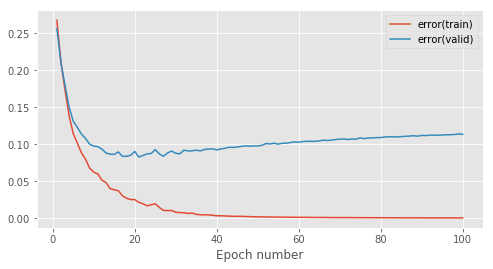

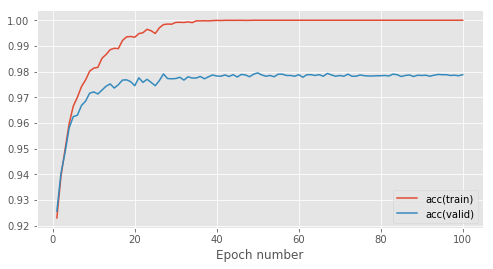

In [57]:
# Use Fan-in for SELU 2 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = Fan_out_UniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_SELU_2_FanOut, keys, run_time, fig_1_SELU_2_FanOut, ax_1, fig_2_SELU_2_FanOut, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_SELU_2_FanOut.savefig('error_SELU_2_FanOut_learning_rate_{}.pdf'.format(learning_rate))
fig_2_SELU_2_FanOut.savefig('accuracy_SELU_2_FanOut_learning_rate_{}.pdf'.format(learning_rate))

----
###### Use Glorot uniform init (for SELU 2 hidden layers)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.7s to complete
    error(train)=2.70e-01, acc(train)=9.24e-01, error(valid)=2.53e-01, acc(valid)=9.27e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.6s to complete
    error(train)=2.11e-01, acc(train)=9.39e-01, error(valid)=2.10e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.9s to complete
    error(train)=1.96e-01, acc(train)=9.41e-01, error(valid)=2.00e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.2s to complete
    error(train)=1.36e-01, acc(train)=9.59e-01, error(valid)=1.48e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.7s to complete
    error(train)=1.09e-01, acc(train)=9.68e-01, error(valid)=1.26e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.4s to complete
    error(train)=1.02e-01, acc(train)=9.70e-01, error(valid)=1.25e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.4s to complete
    error(train)=9.33e-02, acc(train)=9.73e-01, error(valid)=1.21e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.6s to complete
    error(train)=7.64e-02, acc(train)=9.78e-01, error(valid)=1.05e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.5s to complete
    error(train)=7.11e-02, acc(train)=9.80e-01, error(valid)=1.05e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.4s to complete
    error(train)=6.04e-02, acc(train)=9.83e-01, error(valid)=9.54e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.4s to complete
    error(train)=5.77e-02, acc(train)=9.83e-01, error(valid)=9.64e-02, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.6s to complete
    error(train)=5.07e-02, acc(train)=9.86e-01, error(valid)=9.57e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.6s to complete
    error(train)=4.56e-02, acc(train)=9.87e-01, error(valid)=9.25e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.4s to complete
    error(train)=4.46e-02, acc(train)=9.88e-01, error(valid)=9.14e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.3s to complete
    error(train)=3.66e-02, acc(train)=9.90e-01, error(valid)=8.96e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.7s to complete
    error(train)=3.32e-02, acc(train)=9.91e-01, error(valid)=8.71e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.2s to complete
    error(train)=3.03e-02, acc(train)=9.92e-01, error(valid)=8.38e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.3s to complete
    error(train)=2.82e-02, acc(train)=9.93e-01, error(valid)=8.30e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.2s to complete
    error(train)=2.59e-02, acc(train)=9.94e-01, error(valid)=8.56e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.1s to complete
    error(train)=2.39e-02, acc(train)=9.94e-01, error(valid)=8.51e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.2s to complete
    error(train)=2.39e-02, acc(train)=9.94e-01, error(valid)=9.23e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.3s to complete
    error(train)=2.37e-02, acc(train)=9.94e-01, error(valid)=8.73e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.5s to complete
    error(train)=1.75e-02, acc(train)=9.97e-01, error(valid)=8.37e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.1s to complete
    error(train)=1.82e-02, acc(train)=9.96e-01, error(valid)=8.86e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.4s to complete
    error(train)=1.50e-02, acc(train)=9.97e-01, error(valid)=8.35e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.1s to complete
    error(train)=1.33e-02, acc(train)=9.98e-01, error(valid)=8.31e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.1s to complete
    error(train)=1.31e-02, acc(train)=9.98e-01, error(valid)=8.55e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.2s to complete
    error(train)=1.13e-02, acc(train)=9.98e-01, error(valid)=8.85e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.3s to complete
    error(train)=9.94e-03, acc(train)=9.99e-01, error(valid)=8.35e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.2s to complete
    error(train)=1.03e-02, acc(train)=9.98e-01, error(valid)=8.63e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.4s to complete
    error(train)=8.42e-03, acc(train)=9.99e-01, error(valid)=8.65e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.4s to complete
    error(train)=7.62e-03, acc(train)=9.99e-01, error(valid)=8.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.3s to complete
    error(train)=6.86e-03, acc(train)=9.99e-01, error(valid)=8.48e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.5s to complete
    error(train)=6.25e-03, acc(train)=1.00e+00, error(valid)=9.04e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.7s to complete
    error(train)=6.30e-03, acc(train)=9.99e-01, error(valid)=8.65e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.4s to complete
    error(train)=5.96e-03, acc(train)=1.00e+00, error(valid)=8.89e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.5s to complete
    error(train)=5.09e-03, acc(train)=1.00e+00, error(valid)=8.82e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.3s to complete
    error(train)=4.37e-03, acc(train)=1.00e+00, error(valid)=8.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.4s to complete
    error(train)=4.17e-03, acc(train)=1.00e+00, error(valid)=8.94e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.4s to complete
    error(train)=3.86e-03, acc(train)=1.00e+00, error(valid)=9.08e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.2s to complete
    error(train)=3.63e-03, acc(train)=1.00e+00, error(valid)=8.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.4s to complete
    error(train)=3.26e-03, acc(train)=1.00e+00, error(valid)=8.98e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.2s to complete
    error(train)=3.36e-03, acc(train)=1.00e+00, error(valid)=9.10e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.5s to complete
    error(train)=3.15e-03, acc(train)=1.00e+00, error(valid)=9.06e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.2s to complete
    error(train)=2.92e-03, acc(train)=1.00e+00, error(valid)=9.18e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.3s to complete
    error(train)=2.59e-03, acc(train)=1.00e+00, error(valid)=9.14e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.5s to complete
    error(train)=2.61e-03, acc(train)=1.00e+00, error(valid)=9.21e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.0s to complete
    error(train)=2.38e-03, acc(train)=1.00e+00, error(valid)=9.34e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.4s to complete
    error(train)=2.51e-03, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.3s to complete
    error(train)=2.17e-03, acc(train)=1.00e+00, error(valid)=9.48e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.4s to complete
    error(train)=2.01e-03, acc(train)=1.00e+00, error(valid)=9.38e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.2s to complete
    error(train)=2.02e-03, acc(train)=1.00e+00, error(valid)=9.65e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.0s to complete
    error(train)=1.84e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.2s to complete
    error(train)=1.86e-03, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.0s to complete
    error(train)=1.73e-03, acc(train)=1.00e+00, error(valid)=9.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.9s to complete
    error(train)=1.70e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.8s to complete
    error(train)=1.62e-03, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.4s to complete
    error(train)=1.62e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.9s to complete
    error(train)=1.56e-03, acc(train)=1.00e+00, error(valid)=9.64e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.2s to complete
    error(train)=1.47e-03, acc(train)=1.00e+00, error(valid)=9.74e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.4s to complete
    error(train)=1.43e-03, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.6s to complete
    error(train)=1.40e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.1s to complete
    error(train)=1.30e-03, acc(train)=1.00e+00, error(valid)=9.84e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.5s to complete
    error(train)=1.28e-03, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.4s to complete
    error(train)=1.33e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.9s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.9s to complete
    error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.5s to complete
    error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=9.96e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.3s to complete
    error(train)=1.09e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.3s to complete
    error(train)=1.06e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.3s to complete
    error(train)=1.03e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.2s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.0s to complete
    error(train)=9.78e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.6s to complete
    error(train)=9.87e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.3s to complete
    error(train)=9.24e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.3s to complete
    error(train)=9.05e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.3s to complete
    error(train)=8.96e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.5s to complete
    error(train)=8.70e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.4s to complete
    error(train)=8.52e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.4s to complete
    error(train)=8.50e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.7s to complete
    error(train)=8.33e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.2s to complete
    error(train)=8.00e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.6s to complete
    error(train)=8.00e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.3s to complete
    error(train)=7.84e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.3s to complete
    error(train)=7.48e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.5s to complete
    error(train)=7.37e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.7s to complete
    error(train)=7.19e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.2s to complete
    error(train)=7.04e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.8s to complete
    error(train)=7.02e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.2s to complete
    error(train)=6.85e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.3s to complete
    error(train)=6.69e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.4s to complete
    error(train)=6.58e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.2s to complete
    error(train)=6.42e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.3s to complete
    error(train)=6.38e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.2s to complete
    error(train)=6.25e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.3s to complete
    error(train)=6.16e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.0s to complete
    error(train)=5.99e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.2s to complete
    error(train)=6.05e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.9s to complete
    error(train)=5.81e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.0s to complete
    error(train)=5.71e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


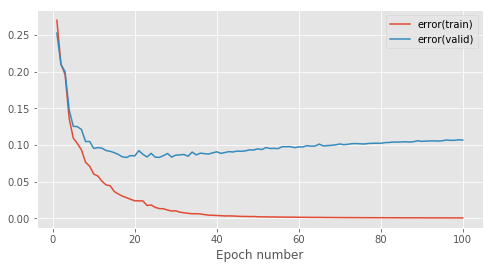

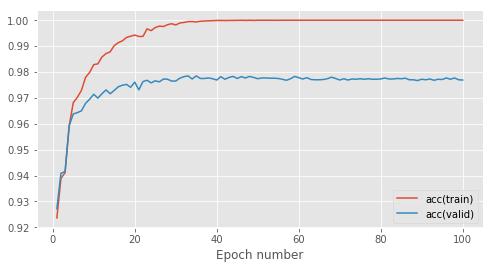

In [39]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

# SELU 
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_SELU_2_GlorotUniformInit, keys, run_time, fig_1_SELU_2_GlorotUniformInit, ax_1, fig_2_SELU_2_GlorotUniformInit, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_SELU_2_GlorotUniformInit.savefig('error_SELU_2_GlorotUniformInit_learning_rate_{}.pdf'.format(learning_rate))
fig_2_SELU_2_GlorotUniformInit.savefig('accuracy_SELU_2_GlorotUniformInit_learning_rate_{}.pdf'.format(learning_rate))

##### Use SELU init layer 
Drawing from a Gaussian with mean 0 and variance 1/n out as recommended by Klambauer et al. [2017].

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.2s to complete
    error(train)=2.70e-01, acc(train)=9.23e-01, error(valid)=2.55e-01, acc(valid)=9.26e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.4s to complete
    error(train)=2.14e-01, acc(train)=9.38e-01, error(valid)=2.07e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.4s to complete
    error(train)=1.67e-01, acc(train)=9.52e-01, error(valid)=1.70e-01, acc(valid)=9.52e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.5s to complete
    error(train)=1.39e-01, acc(train)=9.59e-01, error(valid)=1.48e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.3s to complete
    error(train)=1.23e-01, acc(train)=9.63e-01, error(valid)=1.36e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.5s to complete
    error(train)=1.02e-01, acc(train)=9.70e-01, error(valid)=1.21e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.9s to complete
    error(train)=9.14e-02, acc(train)=9.72e-01, error(valid)=1.17e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.9s to complete
    error(train)=8.86e-02, acc(train)=9.73e-01, error(valid)=1.14e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.2s to complete
    error(train)=7.18e-02, acc(train)=9.78e-01, error(valid)=1.03e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.1s to complete
    error(train)=6.10e-02, acc(train)=9.82e-01, error(valid)=9.84e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.9s to complete
    error(train)=5.73e-02, acc(train)=9.83e-01, error(valid)=9.80e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.1s to complete
    error(train)=5.92e-02, acc(train)=9.82e-01, error(valid)=1.04e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.1s to complete
    error(train)=4.48e-02, acc(train)=9.87e-01, error(valid)=8.76e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.2s to complete
    error(train)=4.36e-02, acc(train)=9.87e-01, error(valid)=8.88e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.3s to complete
    error(train)=3.88e-02, acc(train)=9.89e-01, error(valid)=8.77e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.4s to complete
    error(train)=3.40e-02, acc(train)=9.91e-01, error(valid)=8.68e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.2s to complete
    error(train)=3.41e-02, acc(train)=9.90e-01, error(valid)=8.98e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.0s to complete
    error(train)=2.86e-02, acc(train)=9.93e-01, error(valid)=8.45e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.1s to complete
    error(train)=2.61e-02, acc(train)=9.93e-01, error(valid)=8.63e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.0s to complete
    error(train)=2.76e-02, acc(train)=9.92e-01, error(valid)=9.34e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.6s to complete
    error(train)=2.14e-02, acc(train)=9.95e-01, error(valid)=8.50e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.4s to complete
    error(train)=2.37e-02, acc(train)=9.93e-01, error(valid)=8.98e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.3s to complete
    error(train)=1.69e-02, acc(train)=9.97e-01, error(valid)=8.45e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.4s to complete
    error(train)=1.61e-02, acc(train)=9.97e-01, error(valid)=8.56e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.2s to complete
    error(train)=1.45e-02, acc(train)=9.97e-01, error(valid)=8.45e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=1.38e-02, acc(train)=9.98e-01, error(valid)=8.53e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.3s to complete
    error(train)=1.49e-02, acc(train)=9.97e-01, error(valid)=9.17e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.3s to complete
    error(train)=1.11e-02, acc(train)=9.98e-01, error(valid)=9.13e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.0s to complete
    error(train)=1.15e-02, acc(train)=9.98e-01, error(valid)=9.35e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.4s to complete
    error(train)=9.63e-03, acc(train)=9.98e-01, error(valid)=9.13e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.1s to complete
    error(train)=7.84e-03, acc(train)=9.99e-01, error(valid)=8.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.1s to complete
    error(train)=7.55e-03, acc(train)=9.99e-01, error(valid)=9.20e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.3s to complete
    error(train)=6.94e-03, acc(train)=9.99e-01, error(valid)=9.03e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.3s to complete
    error(train)=7.54e-03, acc(train)=9.99e-01, error(valid)=9.30e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.4s to complete
    error(train)=6.13e-03, acc(train)=9.99e-01, error(valid)=9.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.1s to complete
    error(train)=7.07e-03, acc(train)=9.99e-01, error(valid)=9.60e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.0s to complete
    error(train)=4.62e-03, acc(train)=1.00e+00, error(valid)=9.14e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.1s to complete
    error(train)=4.26e-03, acc(train)=1.00e+00, error(valid)=9.27e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.2s to complete
    error(train)=4.51e-03, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.3s to complete
    error(train)=4.50e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.1s to complete
    error(train)=4.15e-03, acc(train)=1.00e+00, error(valid)=9.83e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.0s to complete
    error(train)=3.29e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.0s to complete
    error(train)=3.10e-03, acc(train)=1.00e+00, error(valid)=9.48e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.1s to complete
    error(train)=4.08e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.3s to complete
    error(train)=2.66e-03, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.3s to complete
    error(train)=2.85e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.3s to complete
    error(train)=2.35e-03, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.3s to complete
    error(train)=2.31e-03, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.3s to complete
    error(train)=2.15e-03, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.3s to complete
    error(train)=2.07e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.4s to complete
    error(train)=2.05e-03, acc(train)=1.00e+00, error(valid)=9.99e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.3s to complete
    error(train)=2.00e-03, acc(train)=1.00e+00, error(valid)=9.98e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.3s to complete
    error(train)=1.82e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.3s to complete
    error(train)=1.73e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.2s to complete
    error(train)=1.63e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.1s to complete
    error(train)=1.61e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.3s to complete
    error(train)=1.54e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.3s to complete
    error(train)=1.46e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.5s to complete
    error(train)=1.44e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.1s to complete
    error(train)=1.39e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.9s to complete
    error(train)=1.37e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.2s to complete
    error(train)=1.29e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.0s to complete
    error(train)=1.28e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.1s to complete
    error(train)=1.21e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.3s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.2s to complete
    error(train)=1.14e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.3s to complete
    error(train)=1.13e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.0s to complete
    error(train)=1.08e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.0s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.2s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.4s to complete
    error(train)=1.00e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.2s to complete
    error(train)=9.83e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.4s to complete
    error(train)=9.45e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.1s to complete
    error(train)=9.38e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.1s to complete
    error(train)=9.17e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.3s to complete
    error(train)=8.85e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.0s to complete
    error(train)=8.52e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.0s to complete
    error(train)=8.34e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.2s to complete
    error(train)=8.19e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.1s to complete
    error(train)=8.05e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.8s to complete
    error(train)=7.94e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.2s to complete
    error(train)=7.74e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.2s to complete
    error(train)=7.55e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.2s to complete
    error(train)=7.40e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.0s to complete
    error(train)=7.22e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.4s to complete
    error(train)=7.06e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.1s to complete
    error(train)=6.91e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.3s to complete
    error(train)=6.88e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.2s to complete
    error(train)=6.85e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.2s to complete
    error(train)=6.63e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.2s to complete
    error(train)=6.53e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.9s to complete
    error(train)=6.31e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.3s to complete
    error(train)=6.22e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.3s to complete
    error(train)=6.29e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.3s to complete
    error(train)=6.02e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.3s to complete
    error(train)=5.94e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.2s to complete
    error(train)=5.91e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.4s to complete
    error(train)=5.73e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.2s to complete
    error(train)=5.70e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.3s to complete
    error(train)=5.56e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


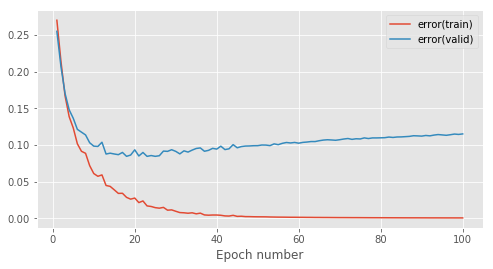

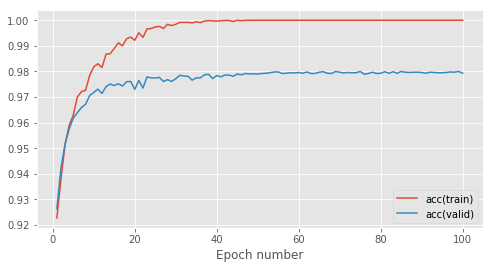

In [60]:
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit, Fan_in_UniformInit, Fan_out_UniformInit


# Use SELUinit for SELU 2 hidden layers
MNISTDataProvider.reset
#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = SELUInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
#return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
stats_SELU_2_SELUInit, keys, run_time, fig_1_SELU_2_SELUInit, ax_1, fig_2_SELU_2_SELUInit, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
fig_1_SELU_2_SELUInit.savefig('error_ReLu_2_SELUInit_learning_rate_{}.pdf'.format(learning_rate))
fig_2_SELU_2_SELUInit.savefig('accuracy_ReLu_2_SELUInit_learning_rate_{}.pdf'.format(learning_rate))

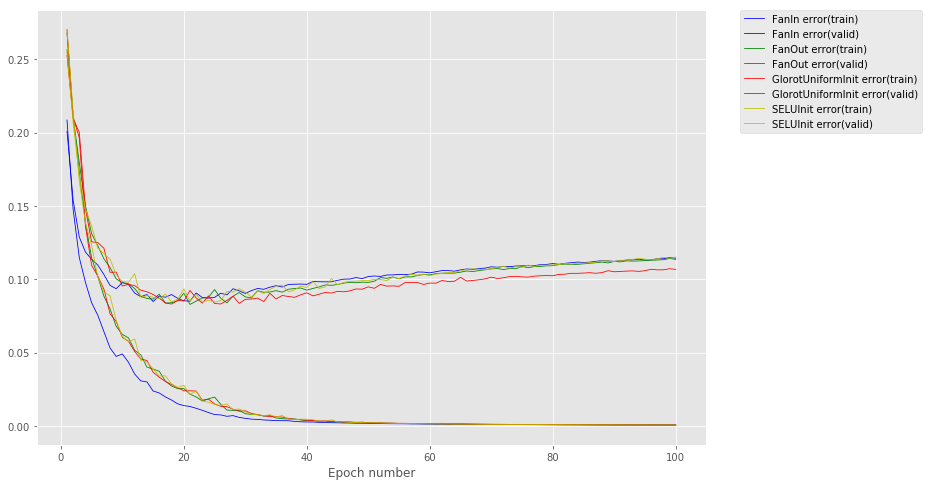

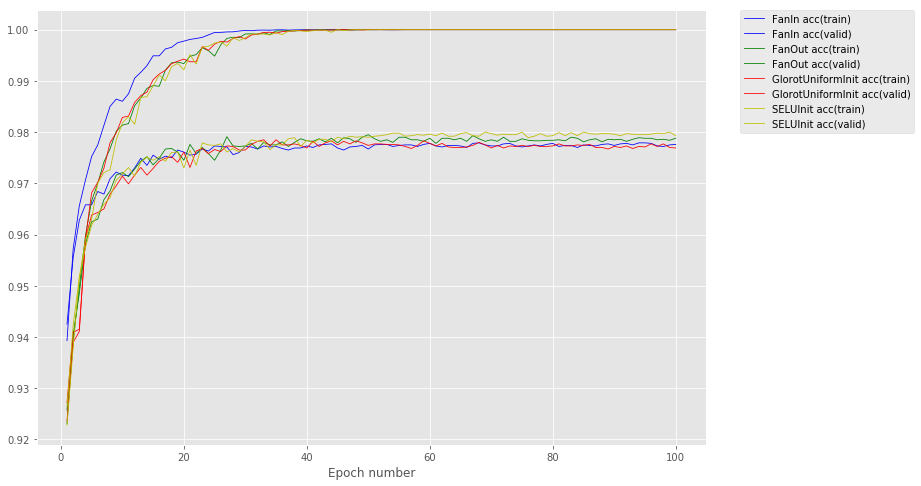

In [65]:
# Plot the change in the validation and training set error over training.
fig_1_comp_init = plt.figure(figsize=(12 , 8))
color = ['b', 'g', 'r', 'y']

plot_list = [stats_SELU_2_FanIn,stats_SELU_2_FanOut,stats_SELU_2_GlorotUniformInit,stats_SELU_2_SELUInit]
plot_list_name = ['FanIn','FanOut','GlorotUniformInit','SELUInit']
ax_1 = fig_1_comp_init.add_subplot(111)

for i,s in enumerate(plot_list):#,stats_ELU_4,stats_ELU_5,stats_ELU_6,stats_ELU_7,stats_ELU_8]:
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, s.shape[0]) * stats_interval, 
              s[1:, keys[k]], label=str(plot_list_name[i]+' '+k),color=color[i],linewidth=0.8)

ax_1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_1.set_xlabel('Epoch number')

# Plot the change in the validation and training set accuracy over training.
fig_2_comp_init = plt.figure(figsize=(12, 8))
ax_2 = fig_2_comp_init.add_subplot(111)
for i,s in enumerate(plot_list):
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, s.shape[0]) * stats_interval, 
              s[1:, keys[k]], label=str(plot_list_name[i]+' '+k),color=color[i],linewidth=0.8)
ax_2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_2.set_xlabel('Epoch number')

fig_1_comp_init.savefig('error_comp_init.pdf',bbox_inches = "tight")
fig_2_comp_init.savefig('accuracy_comp_init.pdf',bbox_inches = "tight" )